# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
def EDA(data, column, target):
    sns.set(style="whitegrid", palette="muted")  # Set a consistent style and color palette

    # Create a 2x2 grid for the boxplot, histogram, mean bar plot, and target count bar plot
    fig, axs = plt.subplots(2, 2, figsize=(18, 10))

    # Boxplot
    sns.boxplot(data[column], ax=axs[0, 0], color='skyblue')
    axs[0, 0].set_title(f'Boxplot of {column}', fontsize=14, fontweight='bold')
    axs[0, 0].set_xlabel(column, fontsize=12)
    axs[0, 0].grid(True)
    
    # Calculate and print boxplot values
    boxplot_stats = data[column].describe()
    print(f"Boxplot Values:")
    print(f"  - Mean: {boxplot_stats['mean']:.2f}")
    print(f"  - 25th Percentile: {boxplot_stats['25%']:.2f}")
    print(f"  - 50th Percentile (Median): {boxplot_stats['50%']:.2f}")
    print(f"  - 75th Percentile: {boxplot_stats['75%']:.2f}")
    print(f"  - Max: {boxplot_stats['max']:.2f}")
    print(f"  - Min: {boxplot_stats['min']:.2f}")
    
    # Histogram
    sns.histplot(data[column], ax=axs[0, 1], kde=True, color='coral')
    axs[0, 1].set_title(f'Histogram of {column}', fontsize=14, fontweight='bold')
    axs[0, 1].set_xlabel(column, fontsize=12)
    axs[0, 1].grid(True)


    # Group data by the target and calculate the mean of the column
    grouped_data = data.groupby(target)[column].mean().reset_index()

    # Bar plot showing the mean of 'column' grouped by 'target'
    sns.barplot(x=target, y=column, data=grouped_data, ax=axs[1, 0])
    axs[1, 0].set_title(f'Mean of {column} by {target}', fontsize=14, fontweight='bold')
    axs[1, 0].set_xlabel(target, fontsize=12)
    axs[1, 0].set_ylabel(f'Mean {column}', fontsize=12)
    axs[1, 0].grid(True)

    # Print mean values by target category
    print(f"Mean Values of {column} by {target}:")
    for _, row in grouped_data.iterrows():
        print(f"  - {target}: {row[target]}, Mean {column}: {row[column]:.2f}")

    # Bar plot showing the count of each 'target' category
    target_counts = data[target].value_counts().reset_index()
    target_counts.columns = [target, 'count']  # Renaming columns for clarity
    sns.barplot(x=target, y='count', data=target_counts, ax=axs[1, 1])
    axs[1, 1].set_title(f'Count of {target} categories', fontsize=14, fontweight='bold')
    axs[1, 1].set_xlabel(target, fontsize=12)
    axs[1, 1].set_ylabel('Count', fontsize=12)
    axs[1, 1].grid(True)


    plt.tight_layout(pad=2.0)  # Ensure a better layout with some padding between subplots
    plt.show()

    # Create scatter plots for every other remaining feature with the selected column
    remaining_features = [col for col in data.columns if col not in [column, target]]
    
    # Create a new figure for scatter plots
    fig, axs = plt.subplots(len(remaining_features), 1, figsize=(15, 5 * len(remaining_features)))  # Adjust figure height based on number of features

    for i, feature in enumerate(remaining_features):
        sns.scatterplot(x=data[feature], y=data[column], ax=axs[i], s=80, color='teal', alpha=0.8)
        axs[i].set_title(f'Scatter Plot of {feature} vs {column}', fontsize=14, fontweight='bold')
        axs[i].set_xlabel(feature, fontsize=12)
        axs[i].set_ylabel(column, fontsize=12)
        axs[i].grid(True)
        
        # Calculate and print correlation coefficient
        correlation = data[[feature, column]].corr().iloc[0, 1]
        print(f"Scatter Plot of {feature} vs {column}:")
        print(f"  - Correlation coefficient: {correlation:.2f}")

    plt.tight_layout(pad=3.0)  # Adjust padding for better readability
    plt.show()


# Load and Display the First Few Rows

In [3]:
data = pd.read_excel('glass.xlsx',sheet_name='glass')
data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron


Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

2 --building_windows_non_float_processed

3 --vehicle_windows_float_processed

4 --vehicle_windows_non_float_processed (none in this database)

5 --containers

6 --tableware

7 --headlamps


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.duplicated().sum()

1

In [6]:
data[data.duplicated(keep=False)==True]

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1

The code data[data.duplicated(keep=False) == True] shows all rows in the DataFrame data that appear more than once and removes all duplicate rows from the DataFrame

In [7]:
data.drop_duplicates(inplace=True)

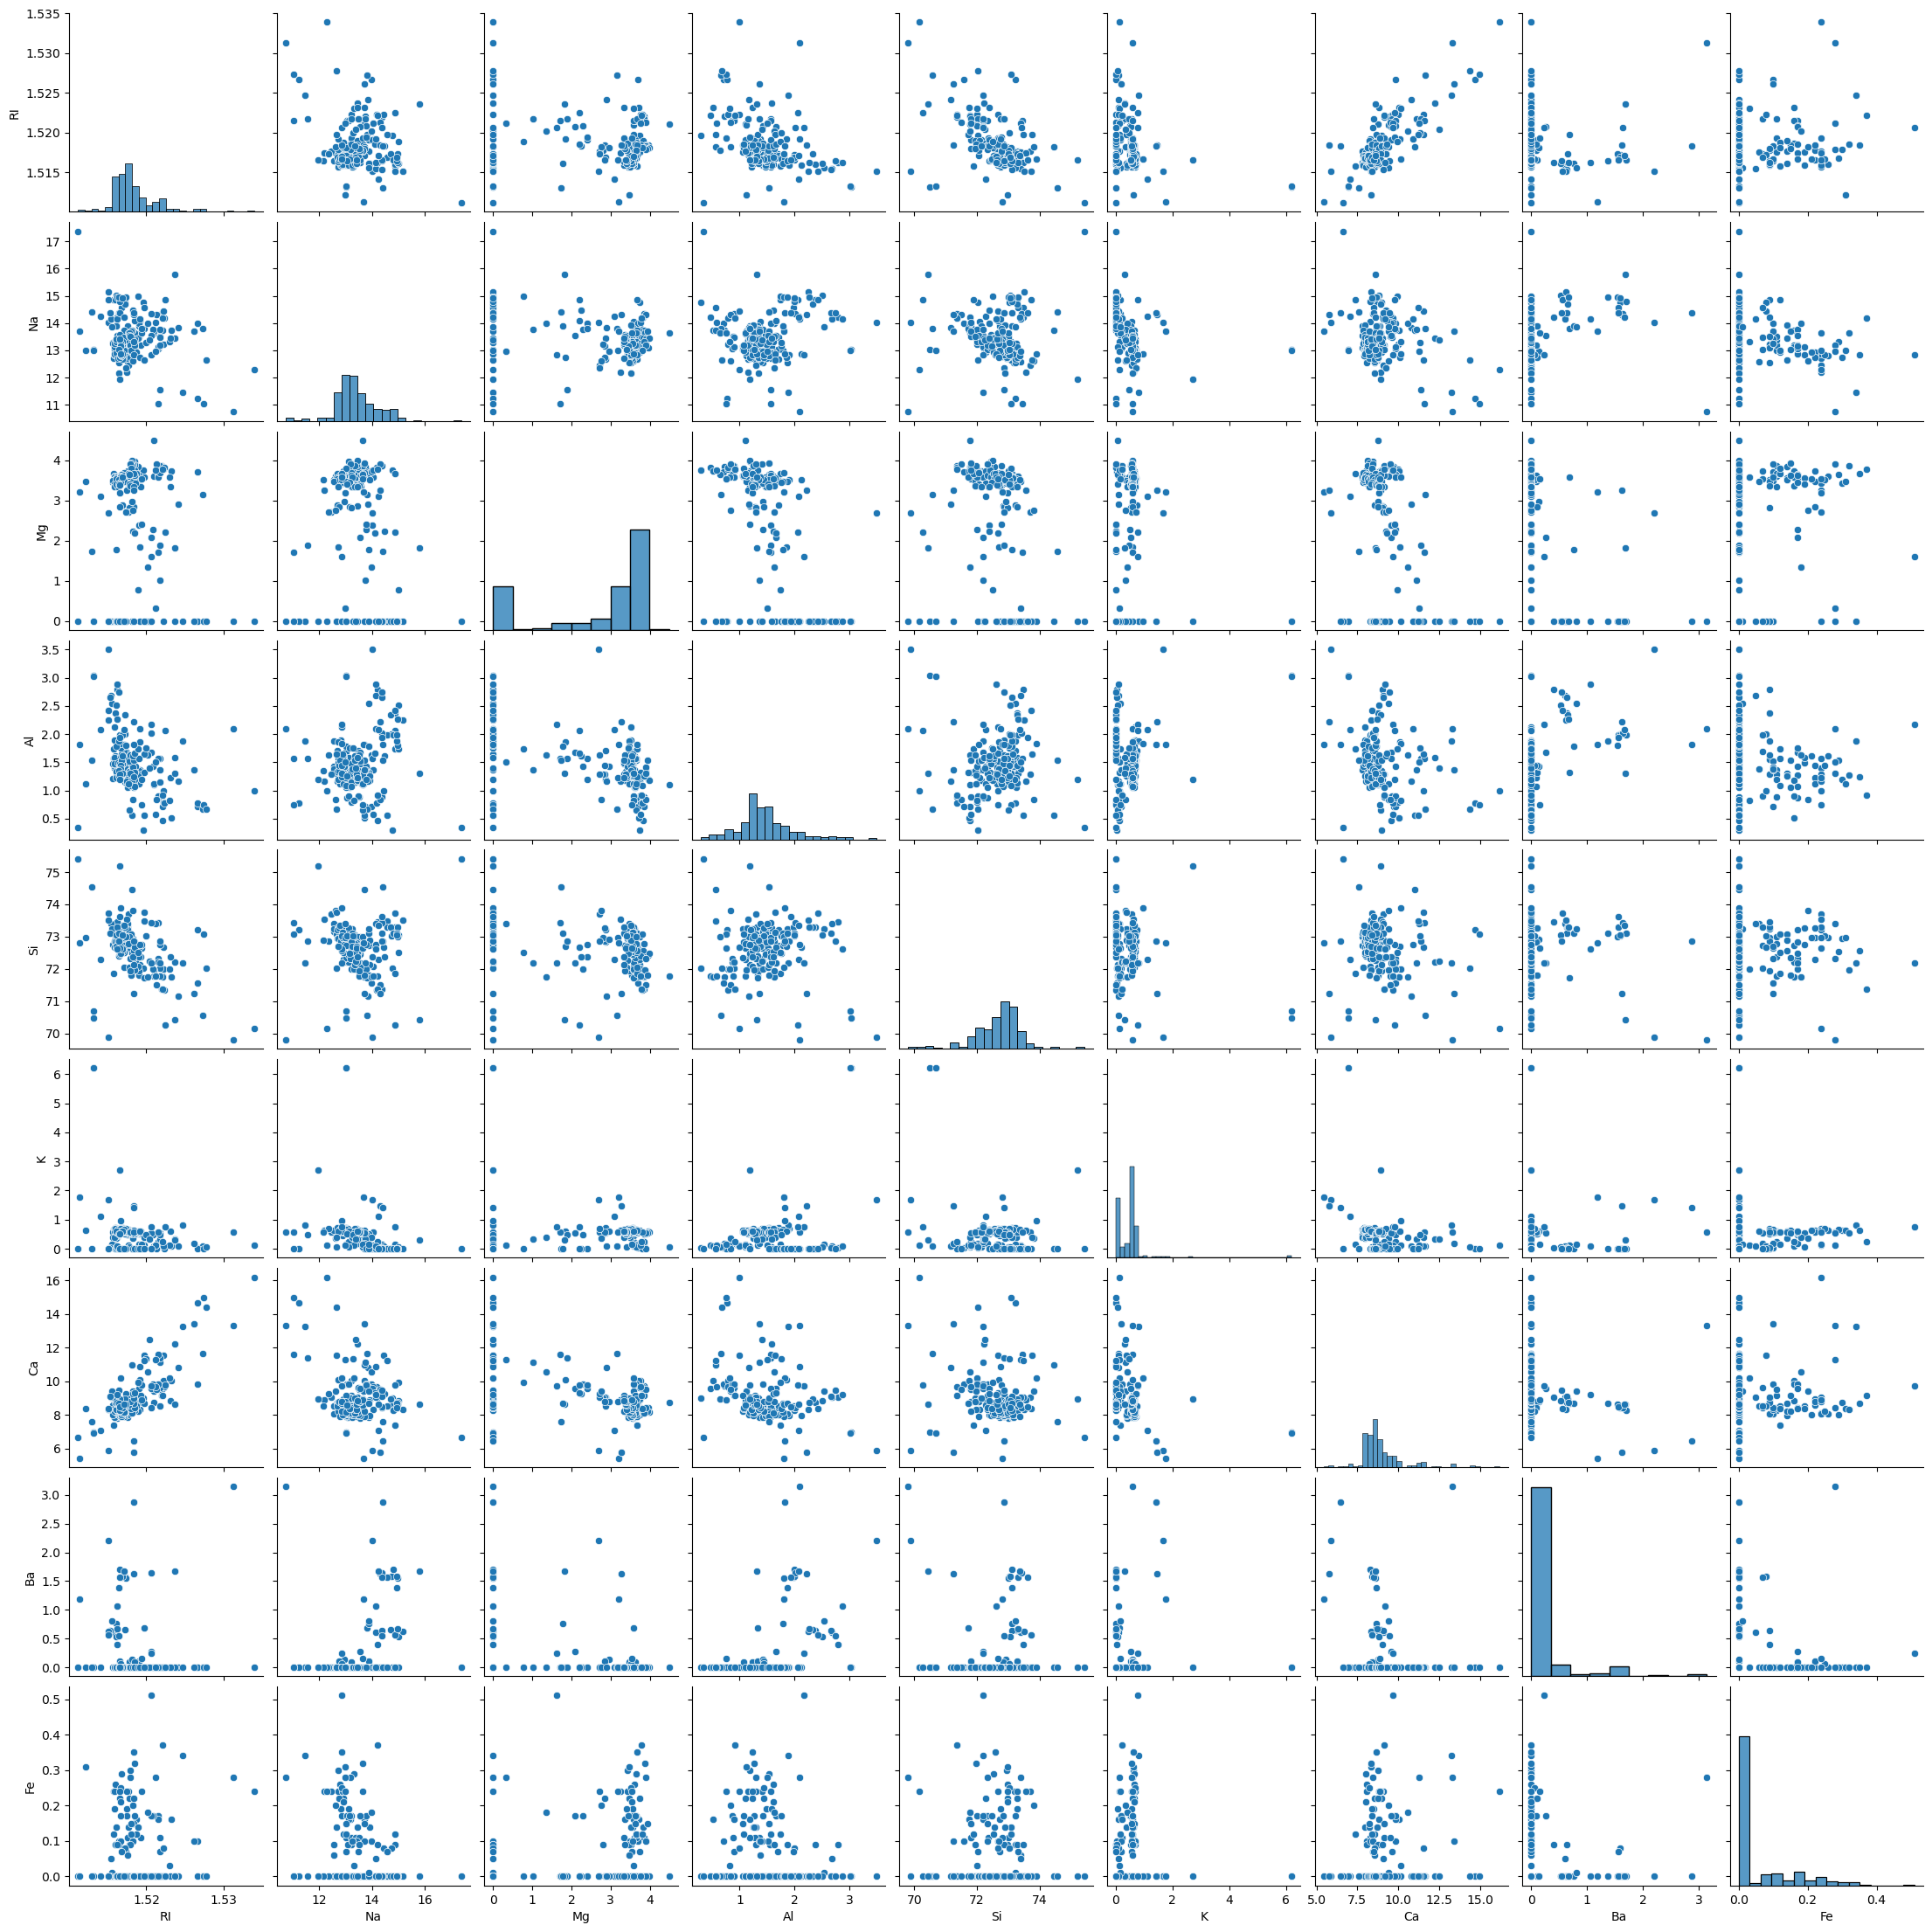

In [8]:
sns.pairplot(data.drop(columns='Type'))

Boxplot Values:
  - Mean: 1.52
  - 25th Percentile: 1.52
  - 50th Percentile (Median): 1.52
  - 75th Percentile: 1.52
  - Max: 1.53
  - Min: 1.51
Mean Values of RI by Type:
  - Type: 1.0, Mean RI: 1.52
  - Type: 2.0, Mean RI: 1.52
  - Type: 3.0, Mean RI: 1.52
  - Type: 5.0, Mean RI: 1.52
  - Type: 6.0, Mean RI: 1.52
  - Type: 7.0, Mean RI: 1.52


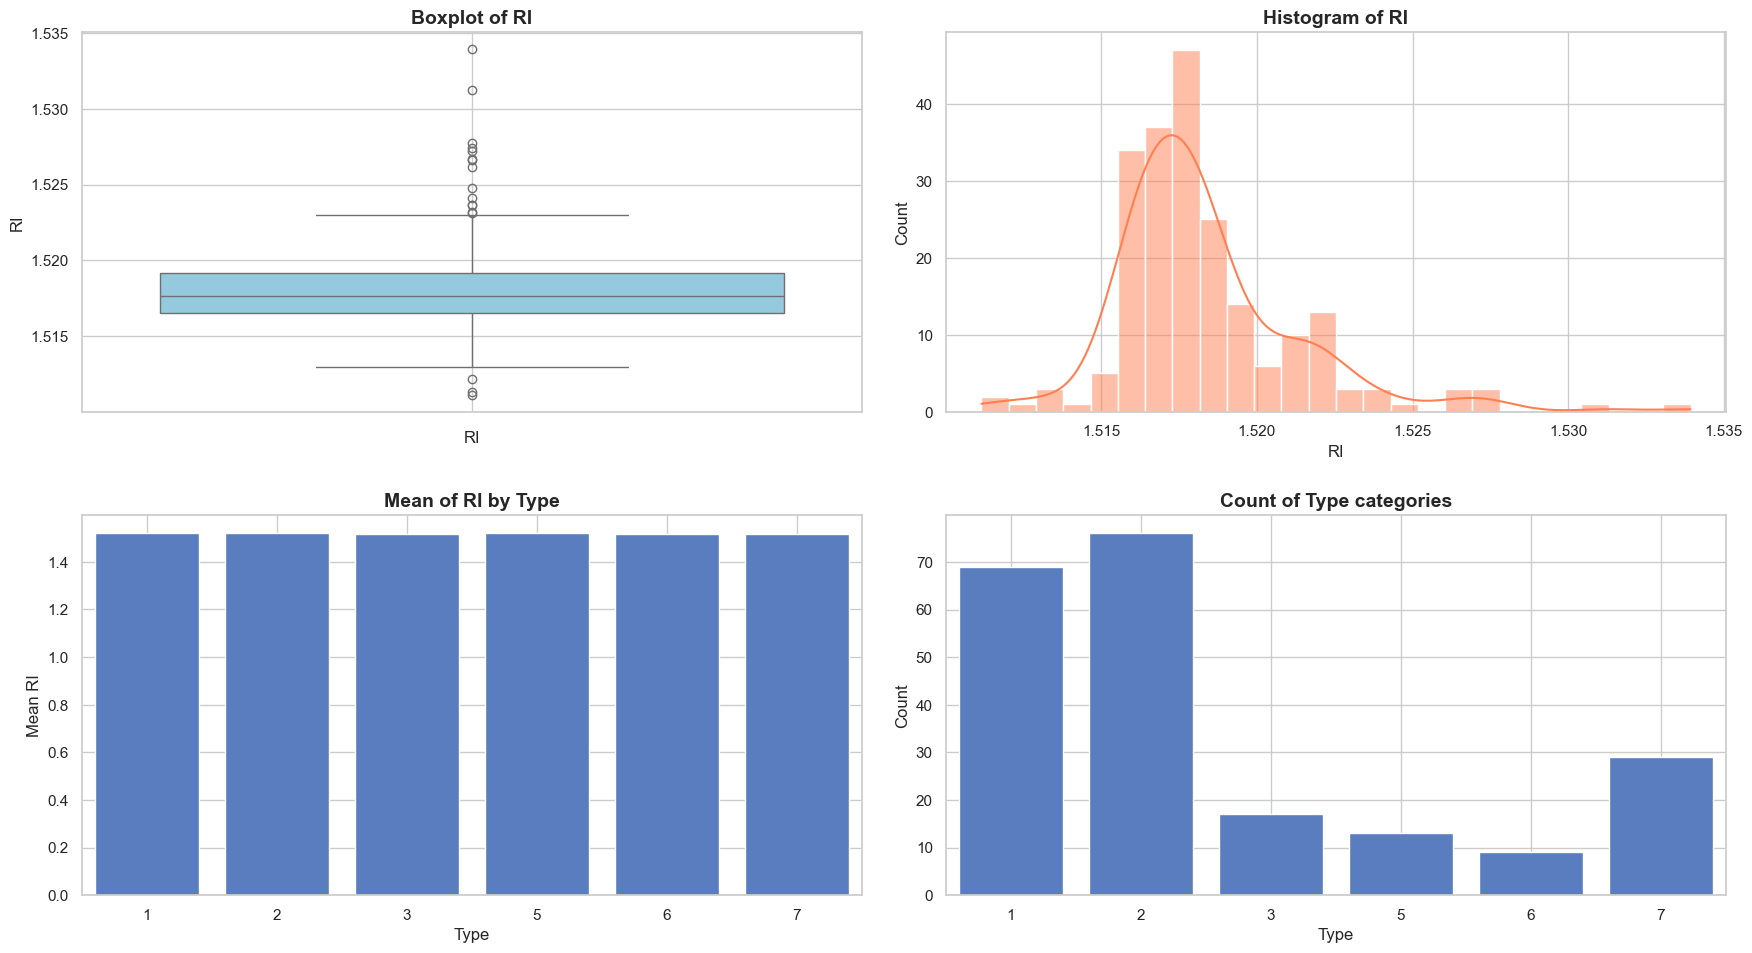

Scatter Plot of Na vs RI:
  - Correlation coefficient: -0.20
Scatter Plot of Mg vs RI:
  - Correlation coefficient: -0.13
Scatter Plot of Al vs RI:
  - Correlation coefficient: -0.40
Scatter Plot of Si vs RI:
  - Correlation coefficient: -0.54
Scatter Plot of K vs RI:
  - Correlation coefficient: -0.29
Scatter Plot of Ca vs RI:
  - Correlation coefficient: 0.81
Scatter Plot of Ba vs RI:
  - Correlation coefficient: 0.00
Scatter Plot of Fe vs RI:
  - Correlation coefficient: 0.15


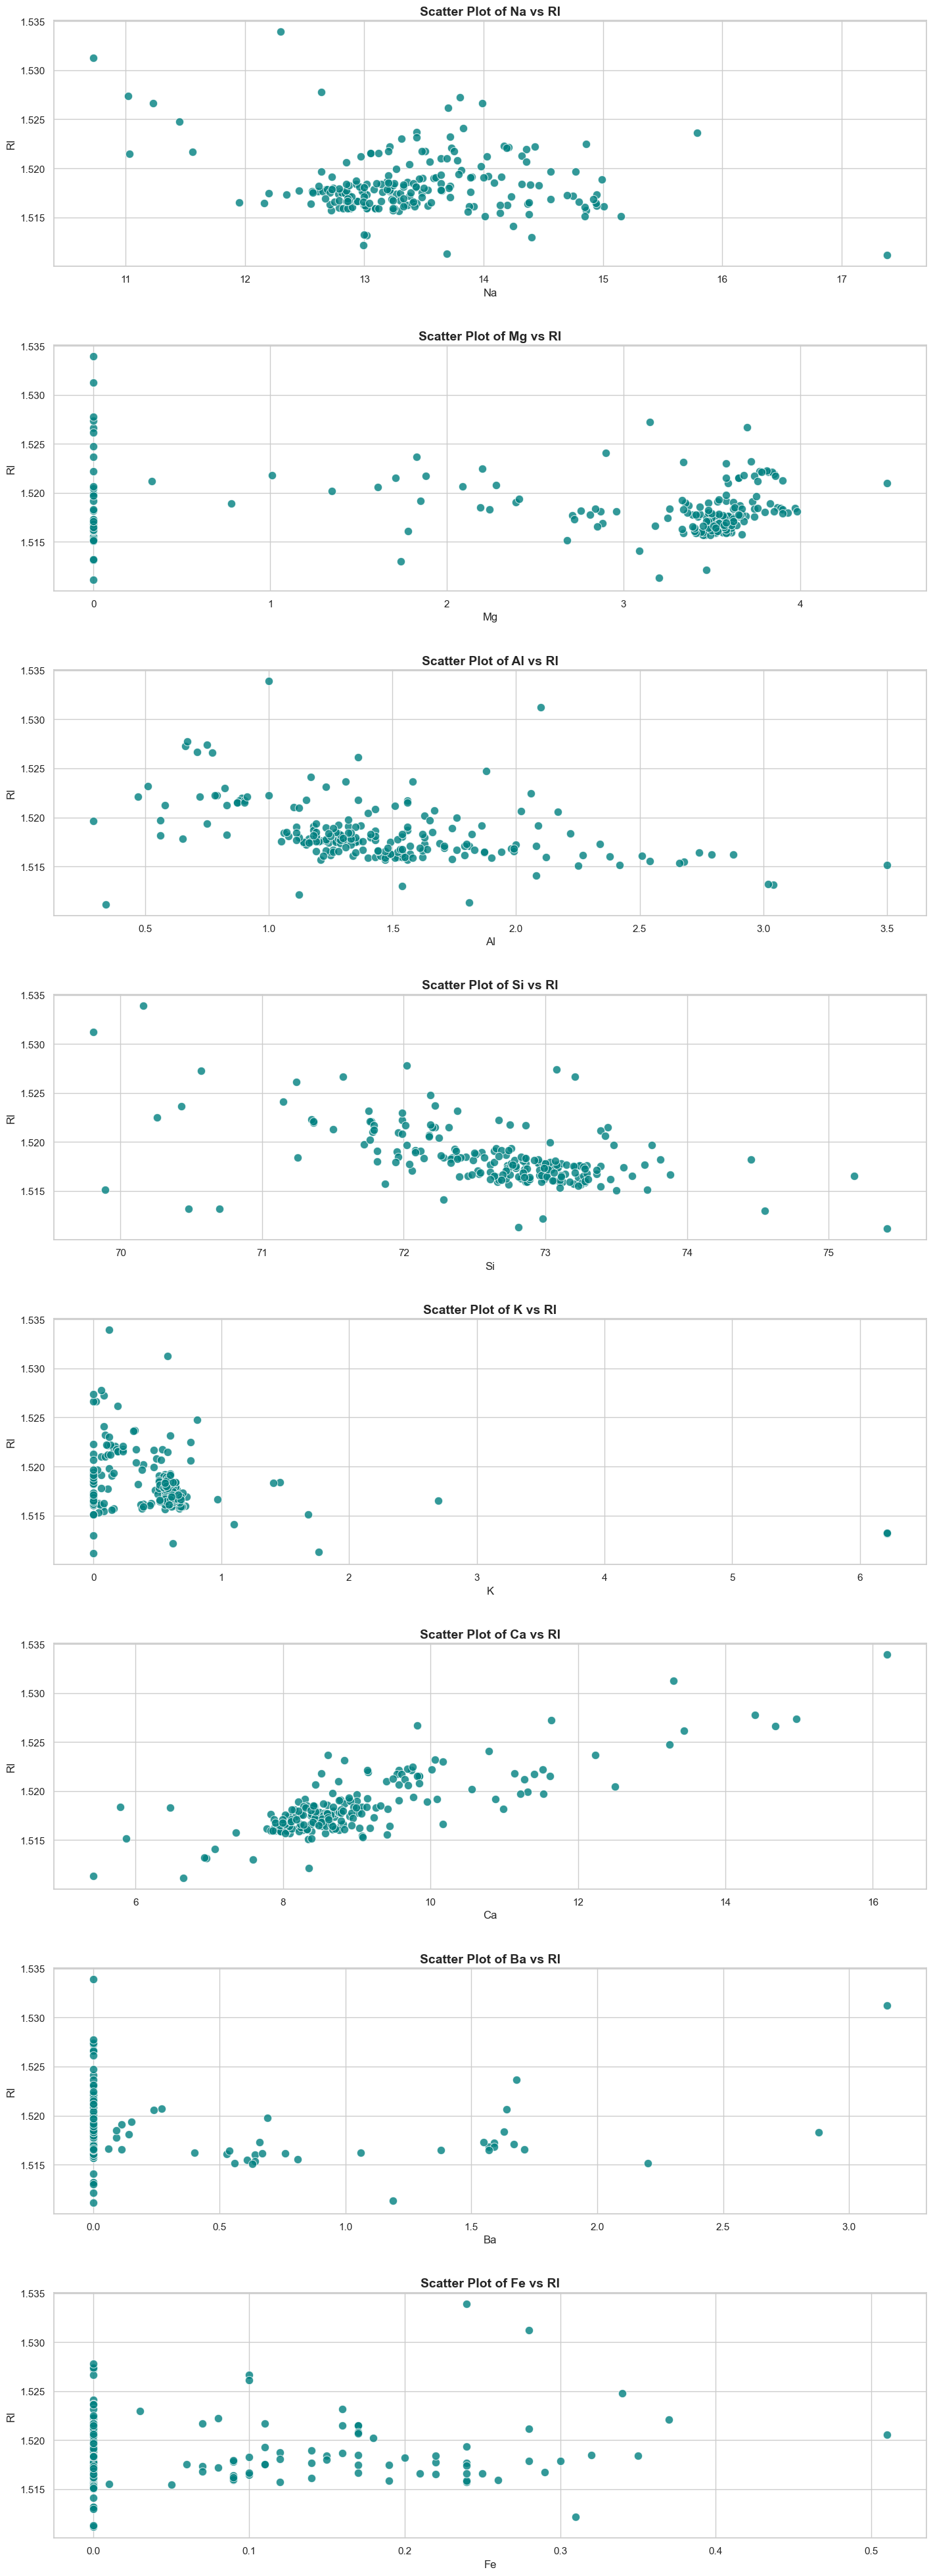

In [9]:
EDA(data,'RI','Type')

- **Boxplot** and **Histogram** show a very narrow range and concentration around the central value, indicating limited variation in the feature.
- **Mean Values by Type** suggest uniformity in the feature’s mean across different categories.
- **Counts of Categories** provide insights into the distribution of observations among the different target categories. 
ks.

- **Strong Positive Correlation:** Calcium (Ca) with a coefficient of 0.81.
- **Moderate to Strong Negative Correlation:** Silicon (Si) with a coefficient of -0.54.
- **Moderate Negative Correlation:** Aluminum (Al) with a coefficient of -0.40.
- **Weak Negative Correlation:** Sodium (Na), Magnesium (Mg), Potassium (K) with coefficients ranging from -0.13 to -0.29.
- **No Correlation:** Barium (Ba) with a coefficient of 0.00.
- **Weak Positive Correlation:** Iron (Fe) with a coefficient of 0.15.

Boxplot Values:
  - Mean: 13.40
  - 25th Percentile: 12.90
  - 50th Percentile (Median): 13.30
  - 75th Percentile: 13.81
  - Max: 17.38
  - Min: 10.73
Mean Values of Na by Type:
  - Type: 1.0, Mean Na: 13.23
  - Type: 2.0, Mean Na: 13.11
  - Type: 3.0, Mean Na: 13.44
  - Type: 5.0, Mean Na: 12.83
  - Type: 6.0, Mean Na: 14.65
  - Type: 7.0, Mean Na: 14.44


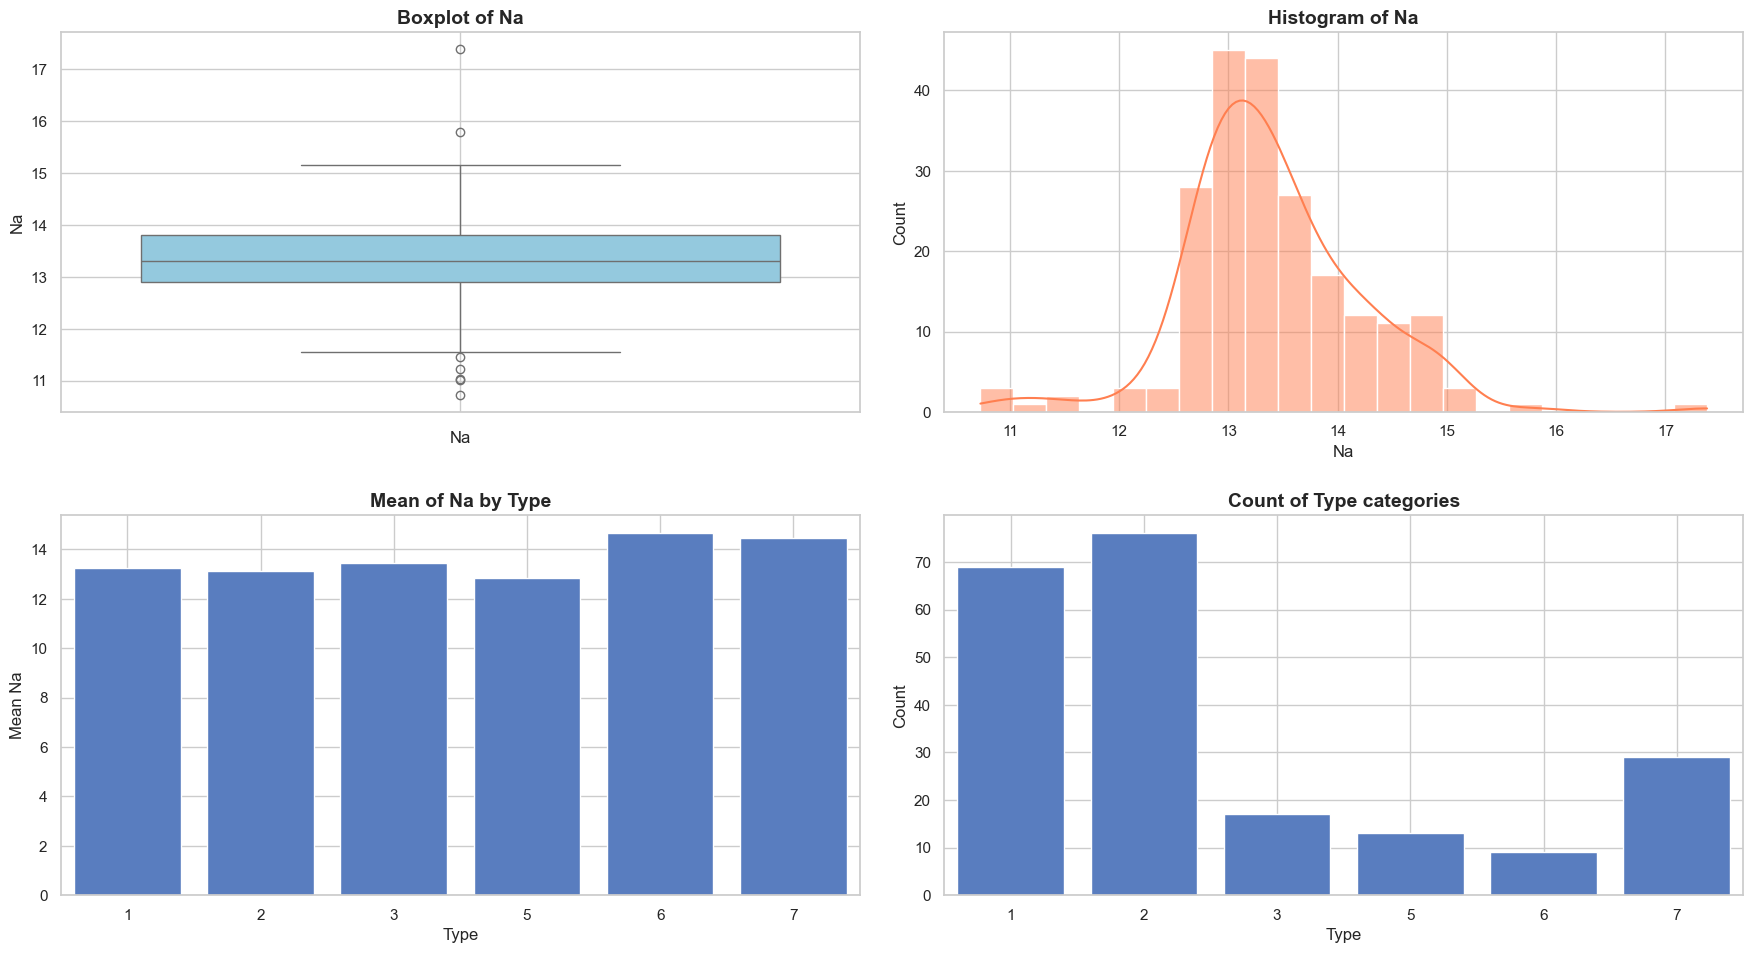

Scatter Plot of RI vs Na:
  - Correlation coefficient: -0.20
Scatter Plot of Mg vs Na:
  - Correlation coefficient: -0.28
Scatter Plot of Al vs Na:
  - Correlation coefficient: 0.17
Scatter Plot of Si vs Na:
  - Correlation coefficient: -0.06
Scatter Plot of K vs Na:
  - Correlation coefficient: -0.26
Scatter Plot of Ca vs Na:
  - Correlation coefficient: -0.28
Scatter Plot of Ba vs Na:
  - Correlation coefficient: 0.33
Scatter Plot of Fe vs Na:
  - Correlation coefficient: -0.24


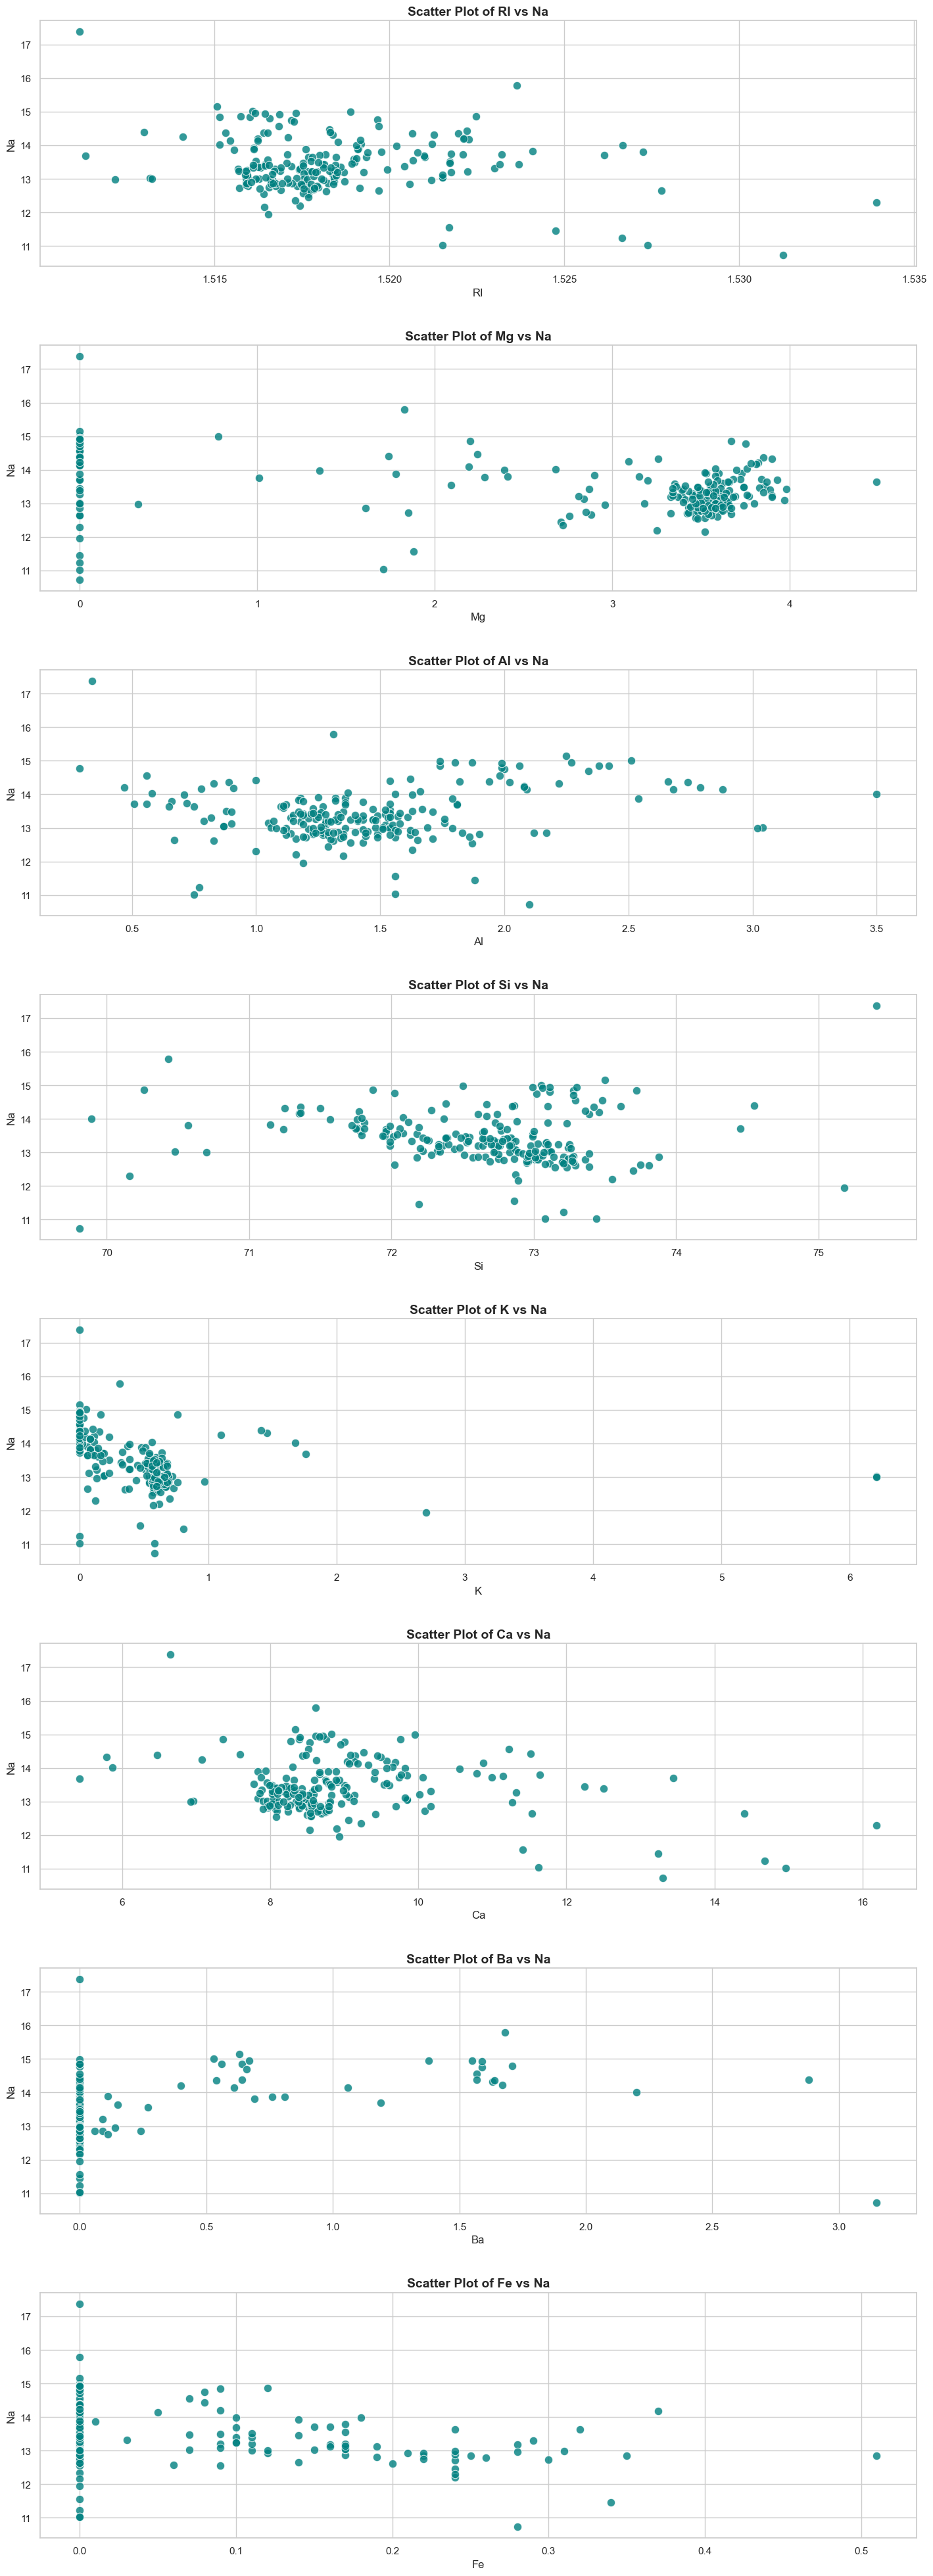

In [10]:
EDA(data,'Na','Type')

- **Boxplot Analysis:**
  - The `Na` values range from 10.73 to 17.38, with a mean of 13.40. The distribution shows that 75% of the values fall between 12.90 and 13.81.

- **Histogram Analysis:**
  - The histogram indicates that `Na` values are most frequently found in the range of 12.73 to 13.39, with fewer observations in the extreme bins.

- **Mean Values by Type:**
  - The mean `Na` value is highest for Type 6 (14.65) and lowest for Type 5 (12.83). This suggests variability in `Na` levels depending on the type.

- **Counts of Type Categories:**
  - Type 2 is the most common with 76 observations, while Type 6 is the least common with only 9 observations.



- **Weak Negative Correlation:** 
  - RI with a coefficient of -0.20
  - Magnesium (Mg) with a coefficient of -0.28
  - Potassium (K) with a coefficient of -0.26
  - Calcium (Ca) with a coefficient of -0.28
  - Iron (Fe) with a coefficient of -0.24

- **Weak Positive Correlation:** 
  - Aluminum (Al) with a coefficient of 0.17
  - Barium (Ba) with a coefficient of 0.33

- **Very Weak or No Correlation:** 
  - Silicon (Si) with a coefficient of -0.06

Boxplot Values:
  - Mean: 2.68
  - 25th Percentile: 2.09
  - 50th Percentile (Median): 3.48
  - 75th Percentile: 3.60
  - Max: 4.49
  - Min: 0.00
Mean Values of Mg by Type:
  - Type: 1.0, Mean Mg: 3.55
  - Type: 2.0, Mean Mg: 3.00
  - Type: 3.0, Mean Mg: 3.54
  - Type: 5.0, Mean Mg: 0.77
  - Type: 6.0, Mean Mg: 1.31
  - Type: 7.0, Mean Mg: 0.54


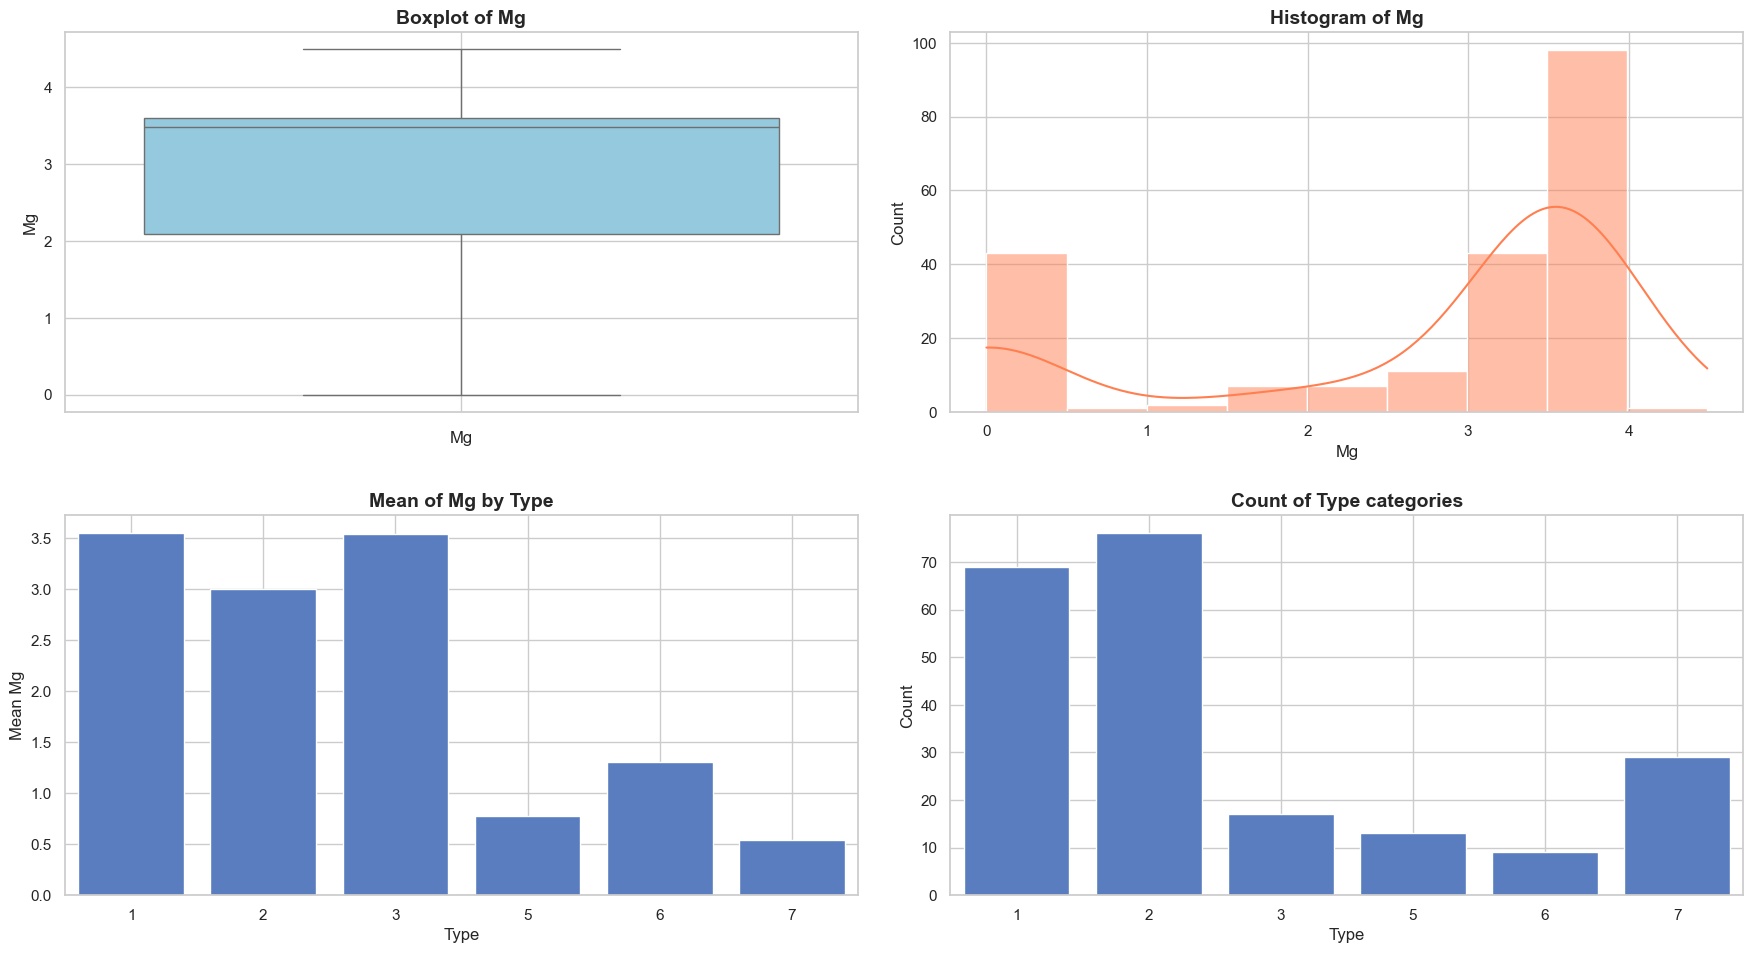

Scatter Plot of RI vs Mg:
  - Correlation coefficient: -0.13
Scatter Plot of Na vs Mg:
  - Correlation coefficient: -0.28
Scatter Plot of Al vs Mg:
  - Correlation coefficient: -0.48
Scatter Plot of Si vs Mg:
  - Correlation coefficient: -0.16
Scatter Plot of K vs Mg:
  - Correlation coefficient: 0.01
Scatter Plot of Ca vs Mg:
  - Correlation coefficient: -0.45
Scatter Plot of Ba vs Mg:
  - Correlation coefficient: -0.49
Scatter Plot of Fe vs Mg:
  - Correlation coefficient: 0.09


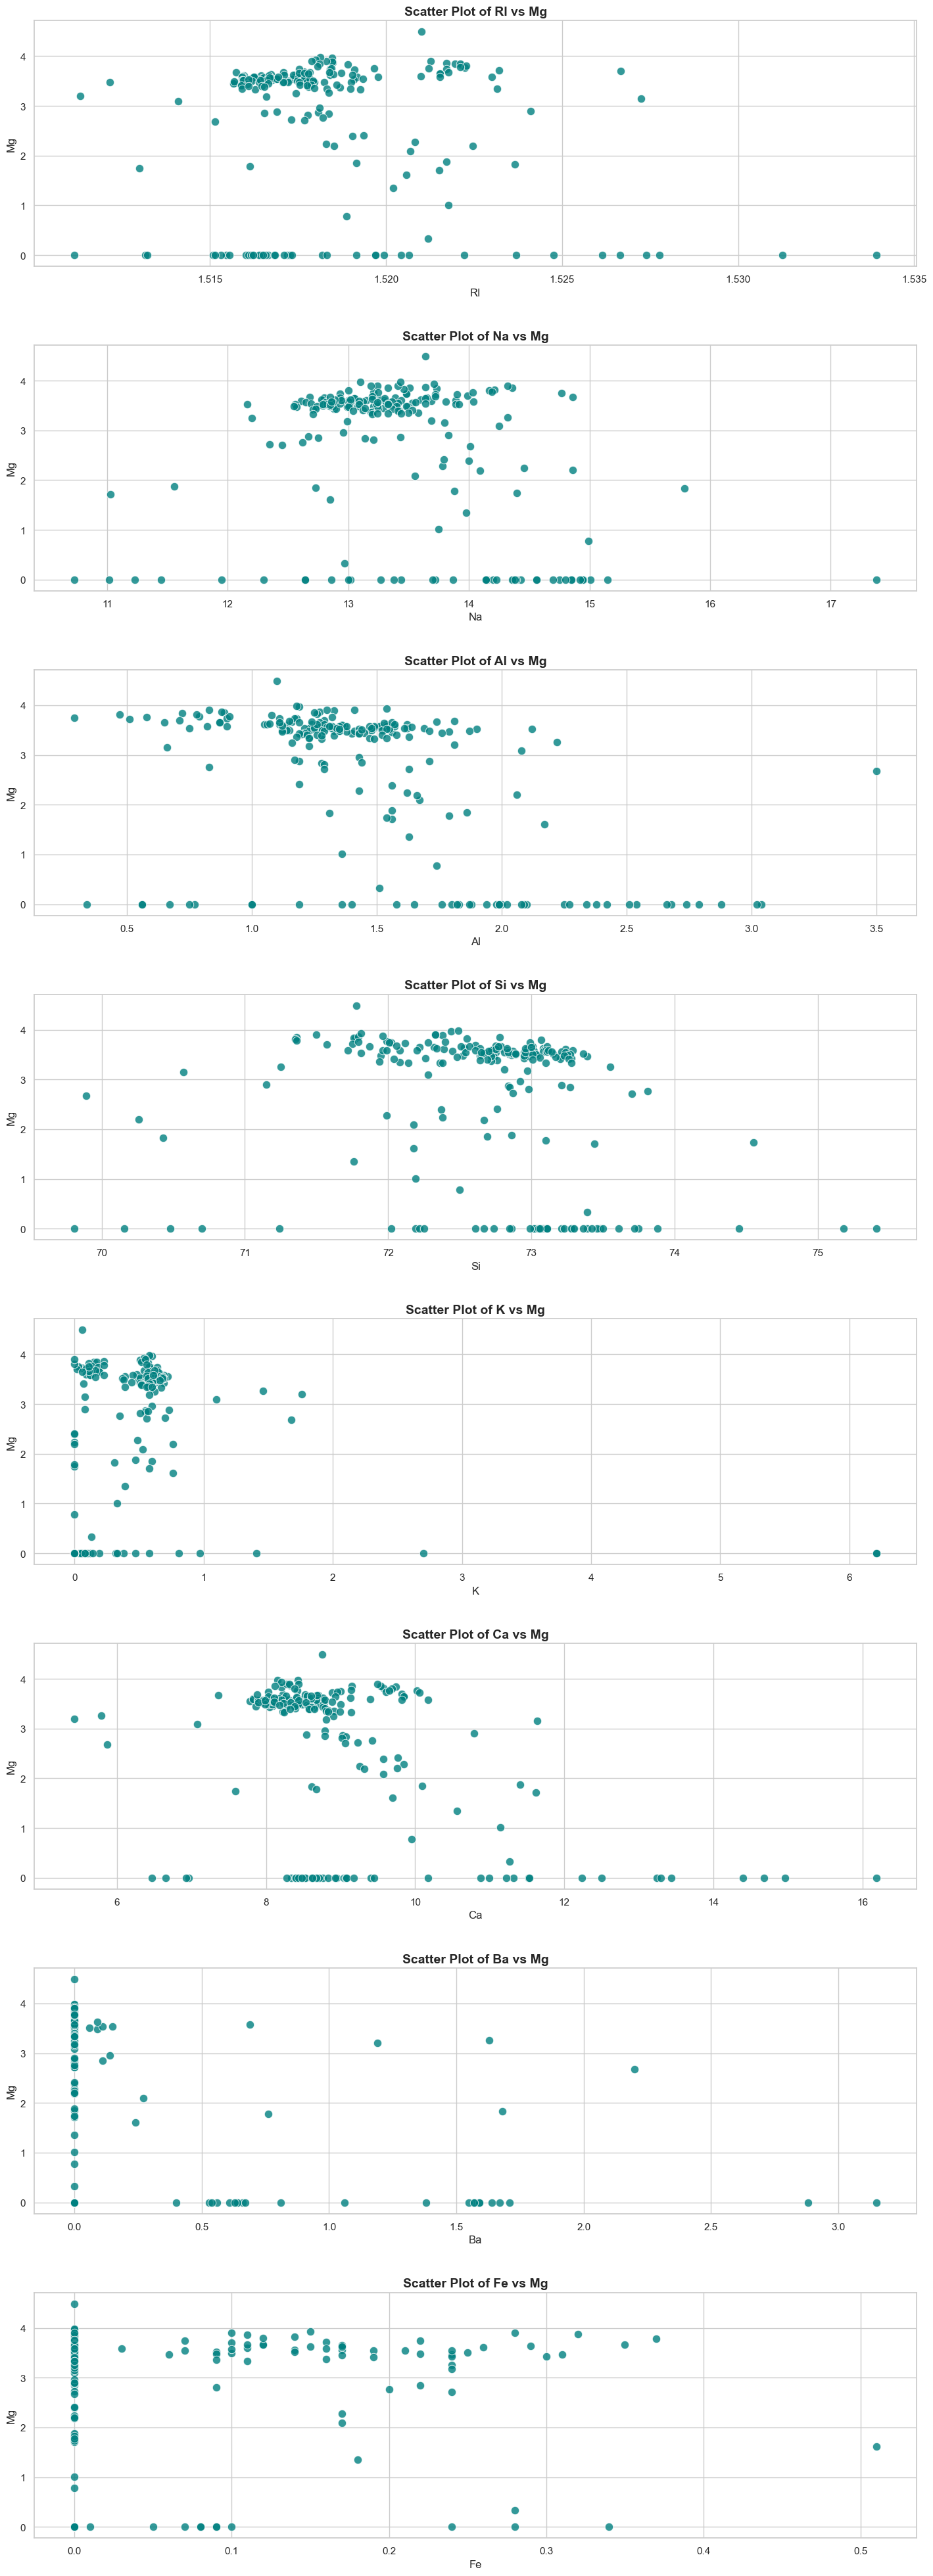

In [11]:
EDA(data,'Mg','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Mg values range from 0.00 to 4.49, with a mean of 2.68.
  - The distribution shows that 75% of the values fall between 2.09 and 3.60.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Mg values are most frequently found in the range of 3.14 to 4.04, with fewer observations in the extreme bins.

### Mean Values by Type:

- **Variability:**
  - The mean Mg value is highest for Type 1 (3.55) and lowest for Type 7 (0.54). This suggests variability in Mg levels depending on the type.



- **Moderate Negative Correlation:**
  - Aluminum (Al) with a coefficient of -0.48
  - Calcium (Ca) with a coefficient of -0.45
  - Barium (Ba) with a coefficient of -0.49

- **Weak Negative Correlation:**
  - RI with a coefficient of -0.13
  - Sodium (Na) with a coefficient of -0.28
  - Silicon (Si) with a coefficient of -0.16

- **Very Weak or No Correlation:**
  - Potassium (K) with a coefficient of 0.01
  - Iron (Fe) with a coefficient of 0.09


Boxplot Values:
  - Mean: 1.45
  - 25th Percentile: 1.19
  - 50th Percentile (Median): 1.36
  - 75th Percentile: 1.63
  - Max: 3.50
  - Min: 0.29
Mean Values of Al by Type:
  - Type: 1.0, Mean Al: 1.17
  - Type: 2.0, Mean Al: 1.41
  - Type: 3.0, Mean Al: 1.20
  - Type: 5.0, Mean Al: 2.03
  - Type: 6.0, Mean Al: 1.37
  - Type: 7.0, Mean Al: 2.12


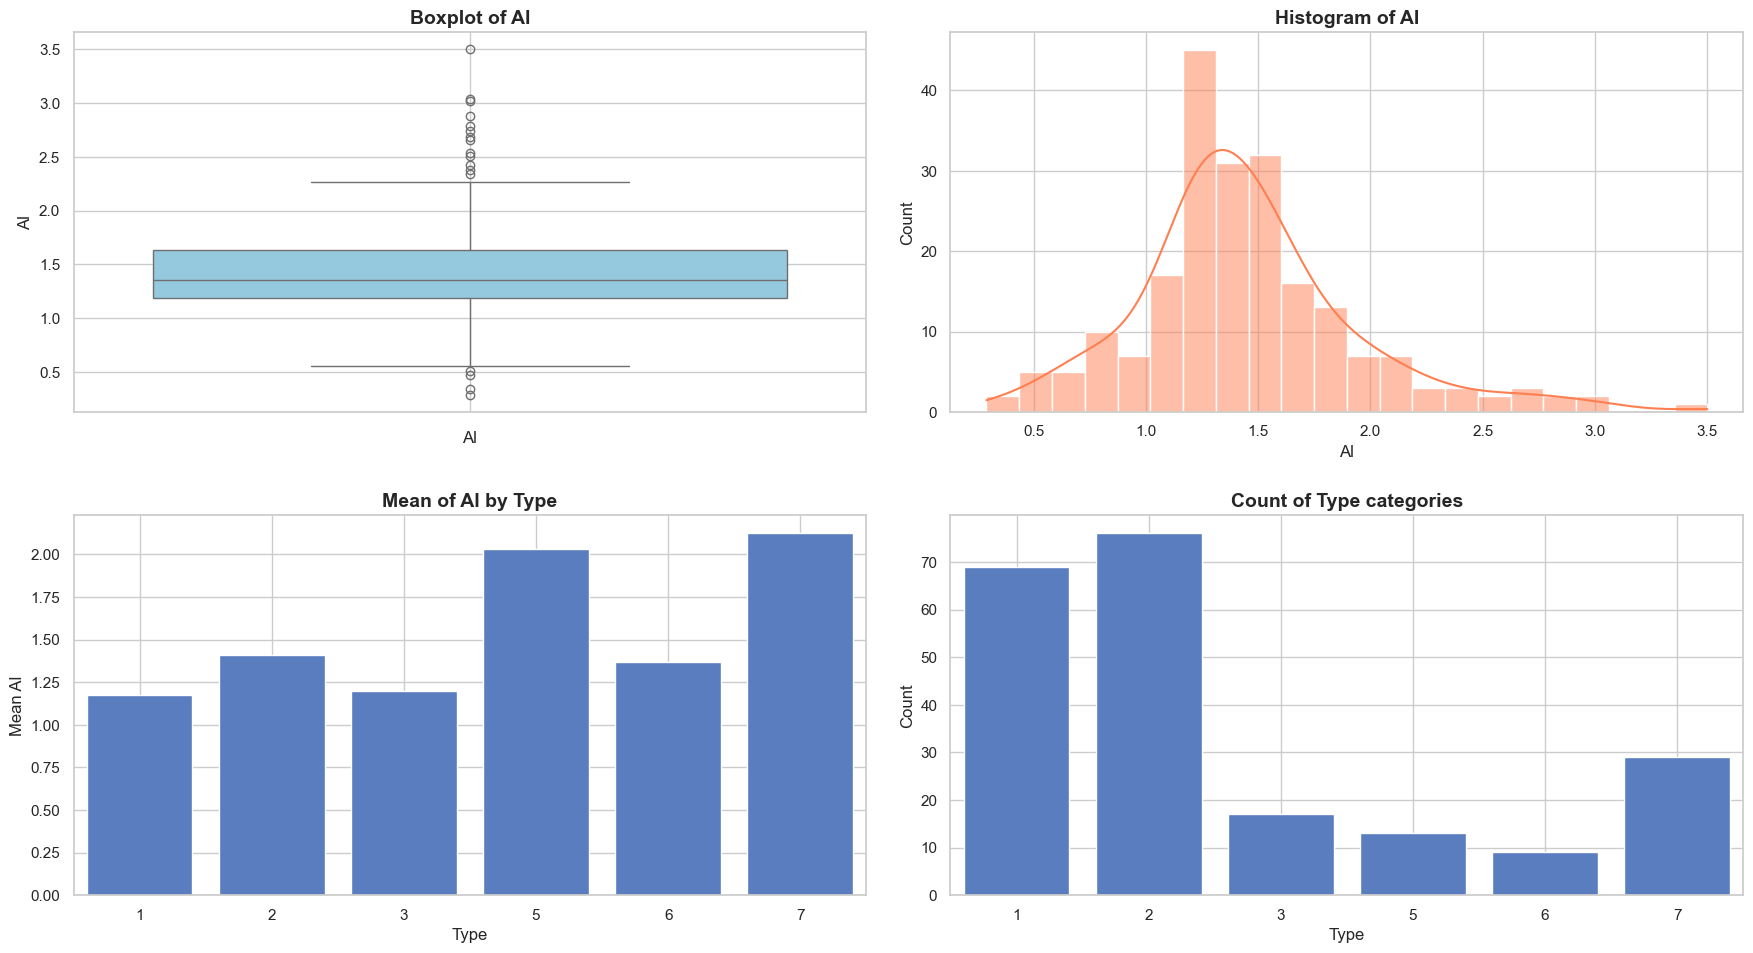

Scatter Plot of RI vs Al:
  - Correlation coefficient: -0.40
Scatter Plot of Na vs Al:
  - Correlation coefficient: 0.17
Scatter Plot of Mg vs Al:
  - Correlation coefficient: -0.48
Scatter Plot of Si vs Al:
  - Correlation coefficient: -0.02
Scatter Plot of K vs Al:
  - Correlation coefficient: 0.32
Scatter Plot of Ca vs Al:
  - Correlation coefficient: -0.26
Scatter Plot of Ba vs Al:
  - Correlation coefficient: 0.48
Scatter Plot of Fe vs Al:
  - Correlation coefficient: -0.08


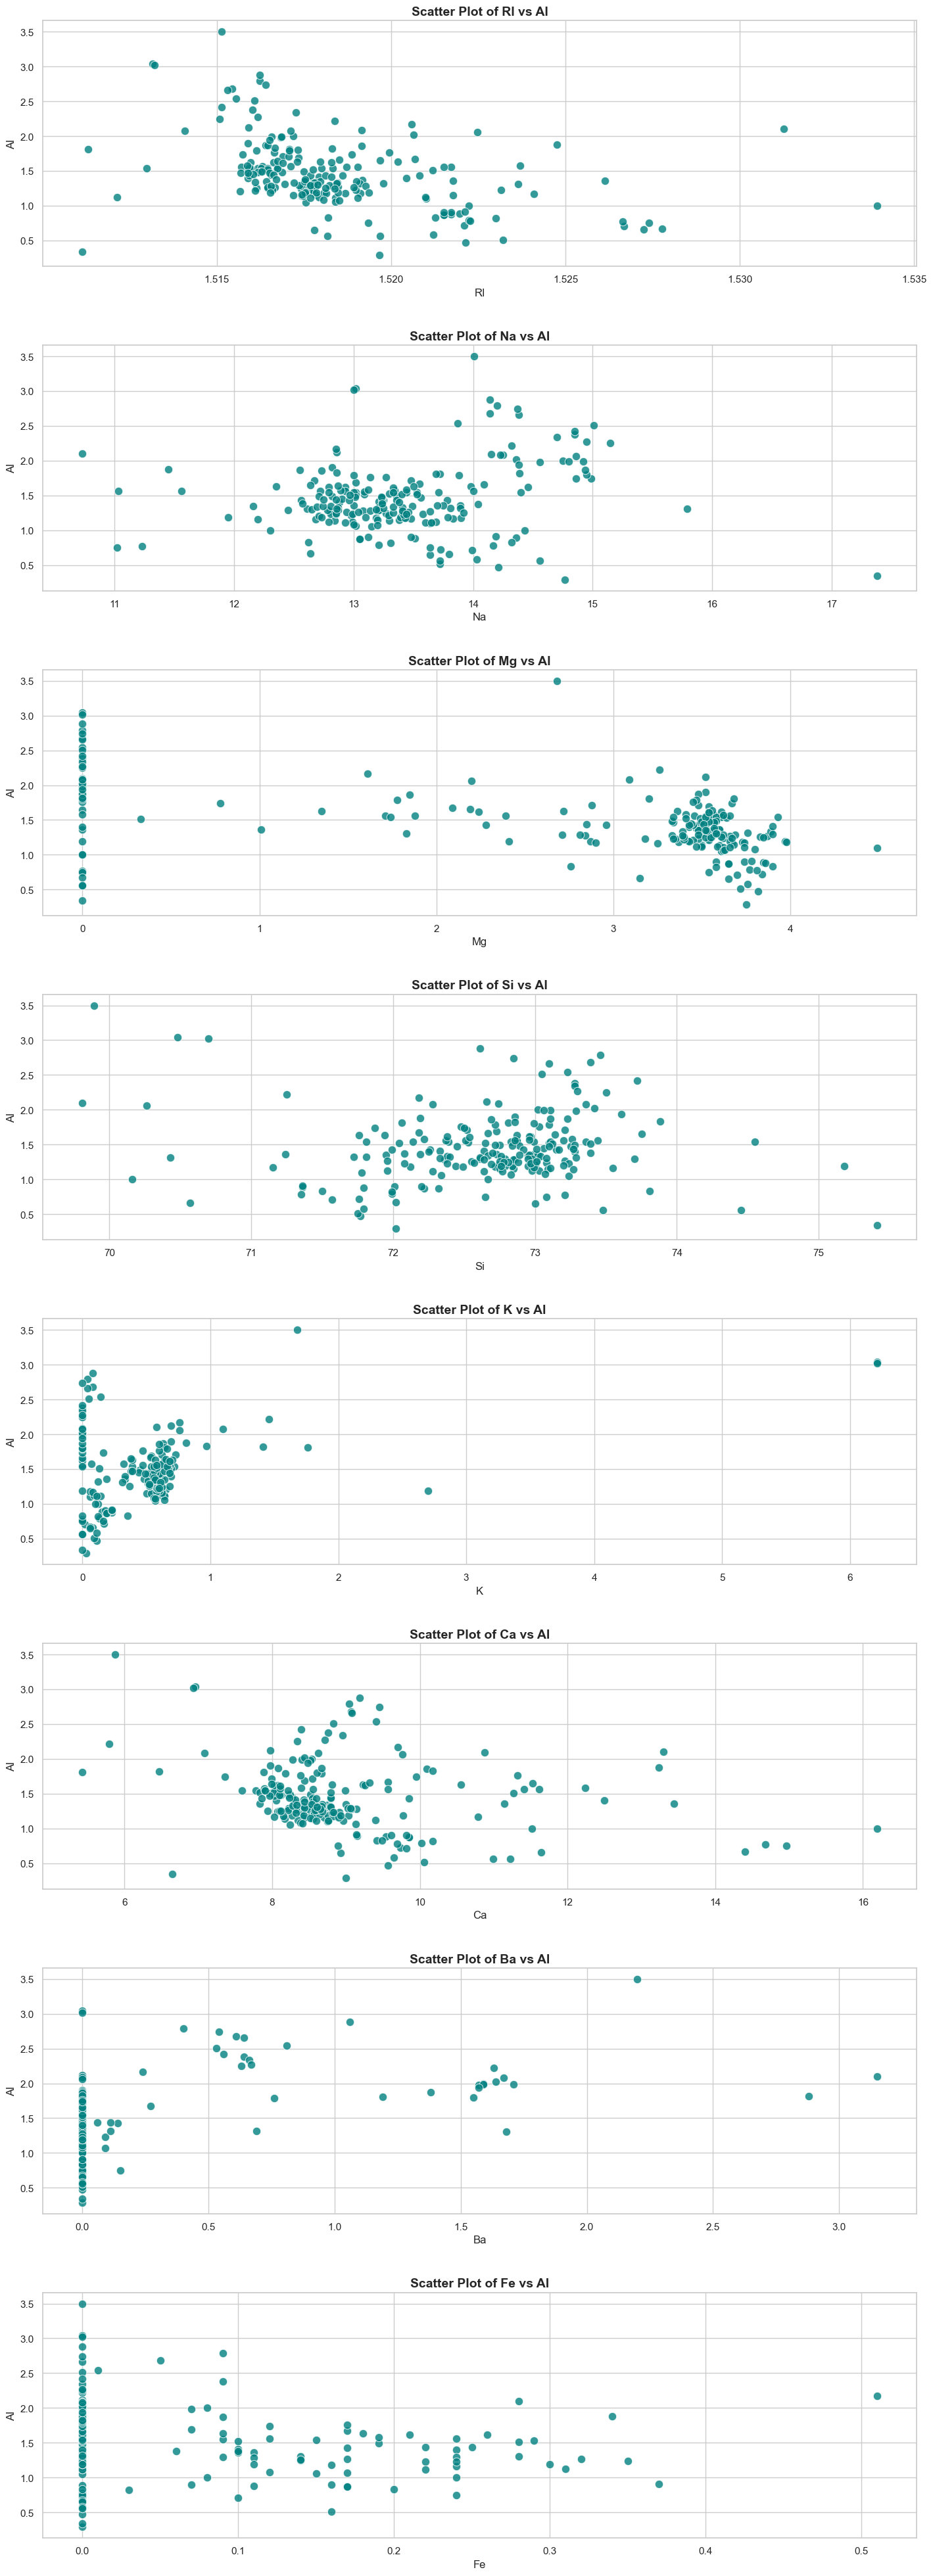

In [12]:
EDA(data,'Al','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Al values range from 0.29 to 3.50, with a mean of 1.45.
  - The distribution shows that 75% of the values fall between 1.19 and 1.63.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Al values are most frequently found in the range of 1.25 to 1.57, with fewer observations in the extreme bins.

### Mean Values by Type:

- **Variability:**
  - The mean Al value is highest for Type 7 (2.12) and lowest for Type 1 (1.17). This suggests variability in Al levels depending on the type.



- **Moderate Negative Correlation:**
  - Aluminum (Al) with a coefficient of -0.48
  - RI with a coefficient of -0.40

- **Weak Negative Correlation:**
  - Calcium (Ca) with a coefficient of -0.26
  - Magnesium (Mg) with a coefficient of -0.48

- **Weak Positive Correlation:**
  - Barium (Ba) with a coefficient of 0.48
  - Potassium (K) with a coefficient of 0.32
  - Sodium (Na) with a coefficient of 0.17

- **Very Weak or No Correlation:**
  - Silicon (Si) with a coefficient of -0.02
  - Iron (Fe) with a coefficient of -0.08

Boxplot Values:
  - Mean: 72.66
  - 25th Percentile: 72.28
  - 50th Percentile (Median): 72.79
  - 75th Percentile: 73.09
  - Max: 75.41
  - Min: 69.81
Mean Values of Si by Type:
  - Type: 1.0, Mean Si: 72.63
  - Type: 2.0, Mean Si: 72.60
  - Type: 3.0, Mean Si: 72.40
  - Type: 5.0, Mean Si: 72.37
  - Type: 6.0, Mean Si: 73.21
  - Type: 7.0, Mean Si: 72.97


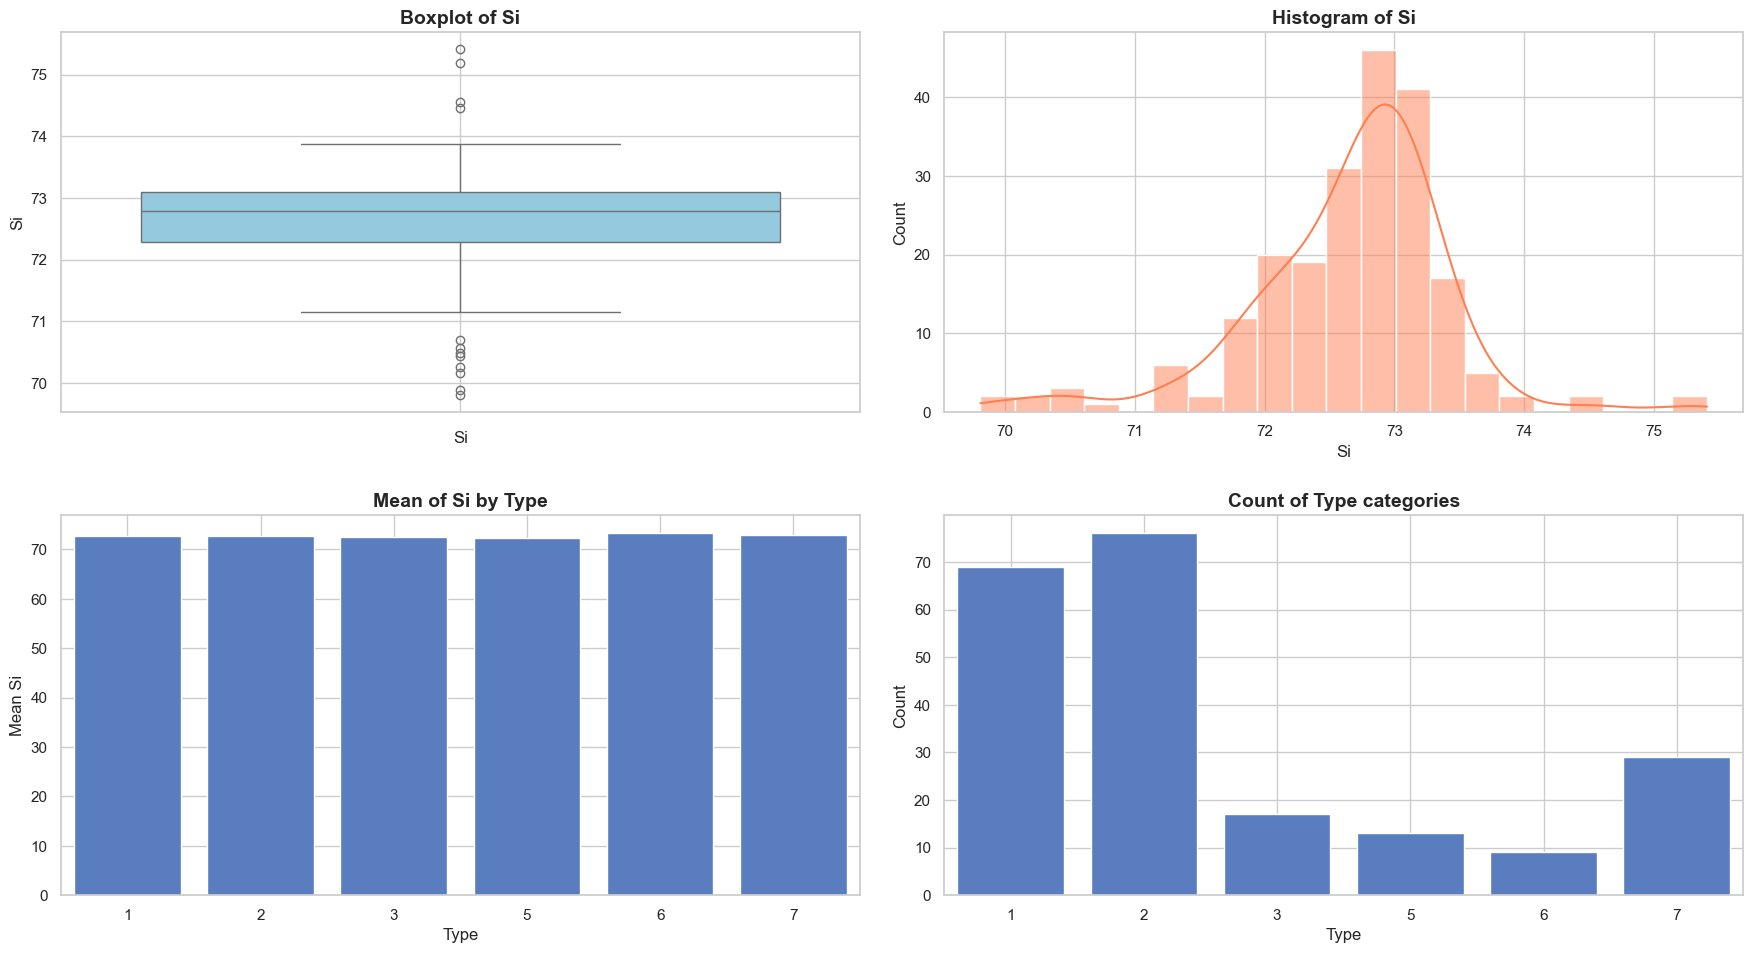

Scatter Plot of RI vs Si:
  - Correlation coefficient: -0.54
Scatter Plot of Na vs Si:
  - Correlation coefficient: -0.06
Scatter Plot of Mg vs Si:
  - Correlation coefficient: -0.16
Scatter Plot of Al vs Si:
  - Correlation coefficient: -0.02
Scatter Plot of K vs Si:
  - Correlation coefficient: -0.20
Scatter Plot of Ca vs Si:
  - Correlation coefficient: -0.21
Scatter Plot of Ba vs Si:
  - Correlation coefficient: -0.10
Scatter Plot of Fe vs Si:
  - Correlation coefficient: -0.10


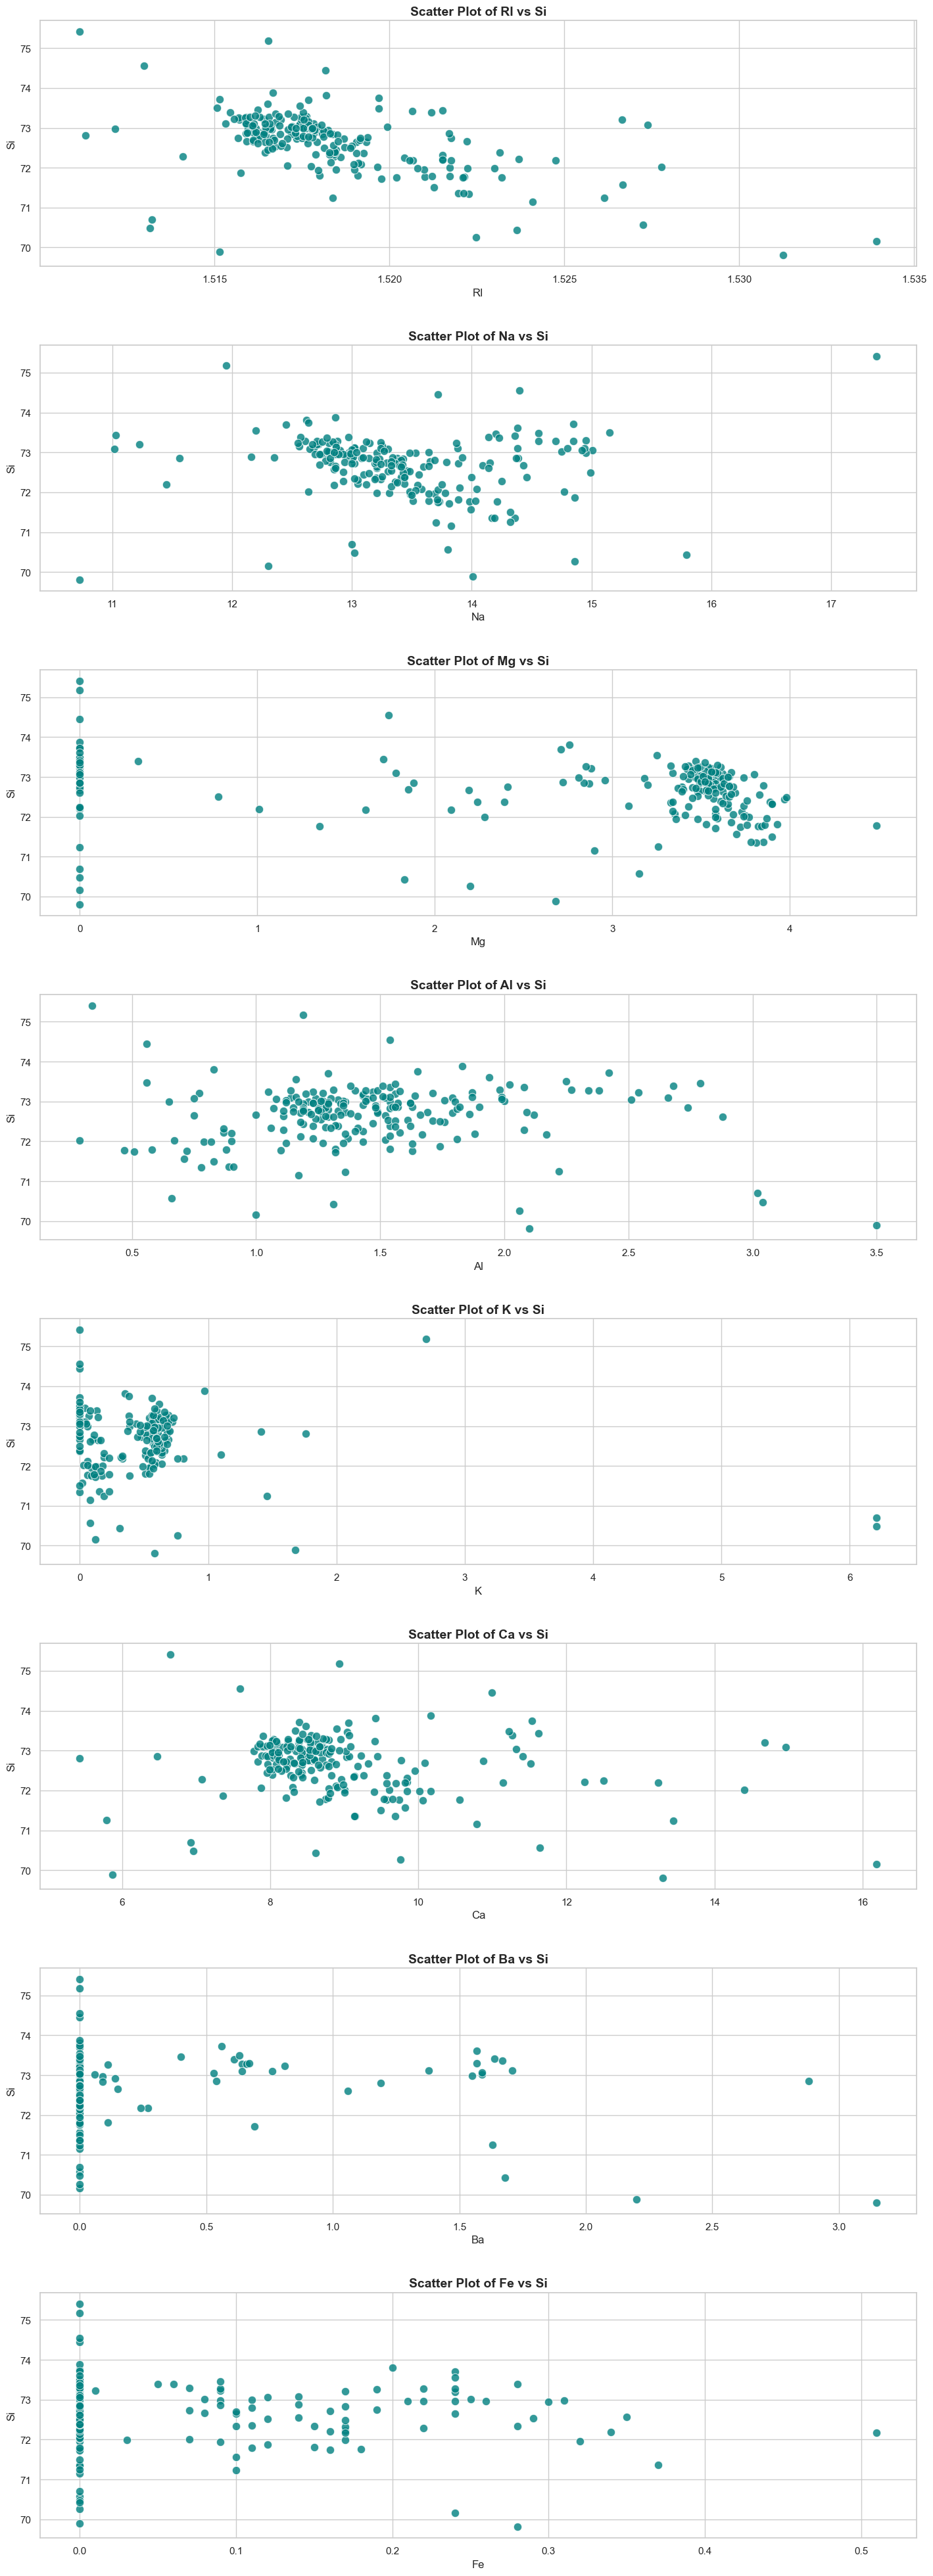

In [13]:
EDA(data,'Si','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Si values range from 69.81 to 75.41, with a mean of 72.66.
  - The distribution shows that 75% of the values fall between 72.28 and 73.09.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Si values are most frequently found in the range of 72.61 to 73.17, with fewer observations in the extreme bins.

### Mean Values by Type:

- **Variability:**
  - The mean Si value is highest for Type 6 (73.21) and lowest for Type 5 (72.37). This suggests variability in Si levels depending on the type.



- **Moderate to Strong Negative Correlation:**
  - Silicon (Si) with RI: -0.54

- **Weak Negative Correlation:**
  - Sodium (Na) with Si: -0.06
  - Magnesium (Mg) with Si: -0.16
  - Potassium (K) with Si: -0.20
  - Calcium (Ca) with Si: -0.21
  - Barium (Ba) with Si: -0.10
  - Iron (Fe) with Si: -0.10

- **No Correlation:**
  - Aluminum (Al) with Si: -0.02

Boxplot Values:
  - Mean: 0.50
  - 25th Percentile: 0.13
  - 50th Percentile (Median): 0.56
  - 75th Percentile: 0.61
  - Max: 6.21
  - Min: 0.00
Mean Values of K by Type:
  - Type: 1.0, Mean K: 0.45
  - Type: 2.0, Mean K: 0.52
  - Type: 3.0, Mean K: 0.41
  - Type: 5.0, Mean K: 1.47
  - Type: 6.0, Mean K: 0.00
  - Type: 7.0, Mean K: 0.33


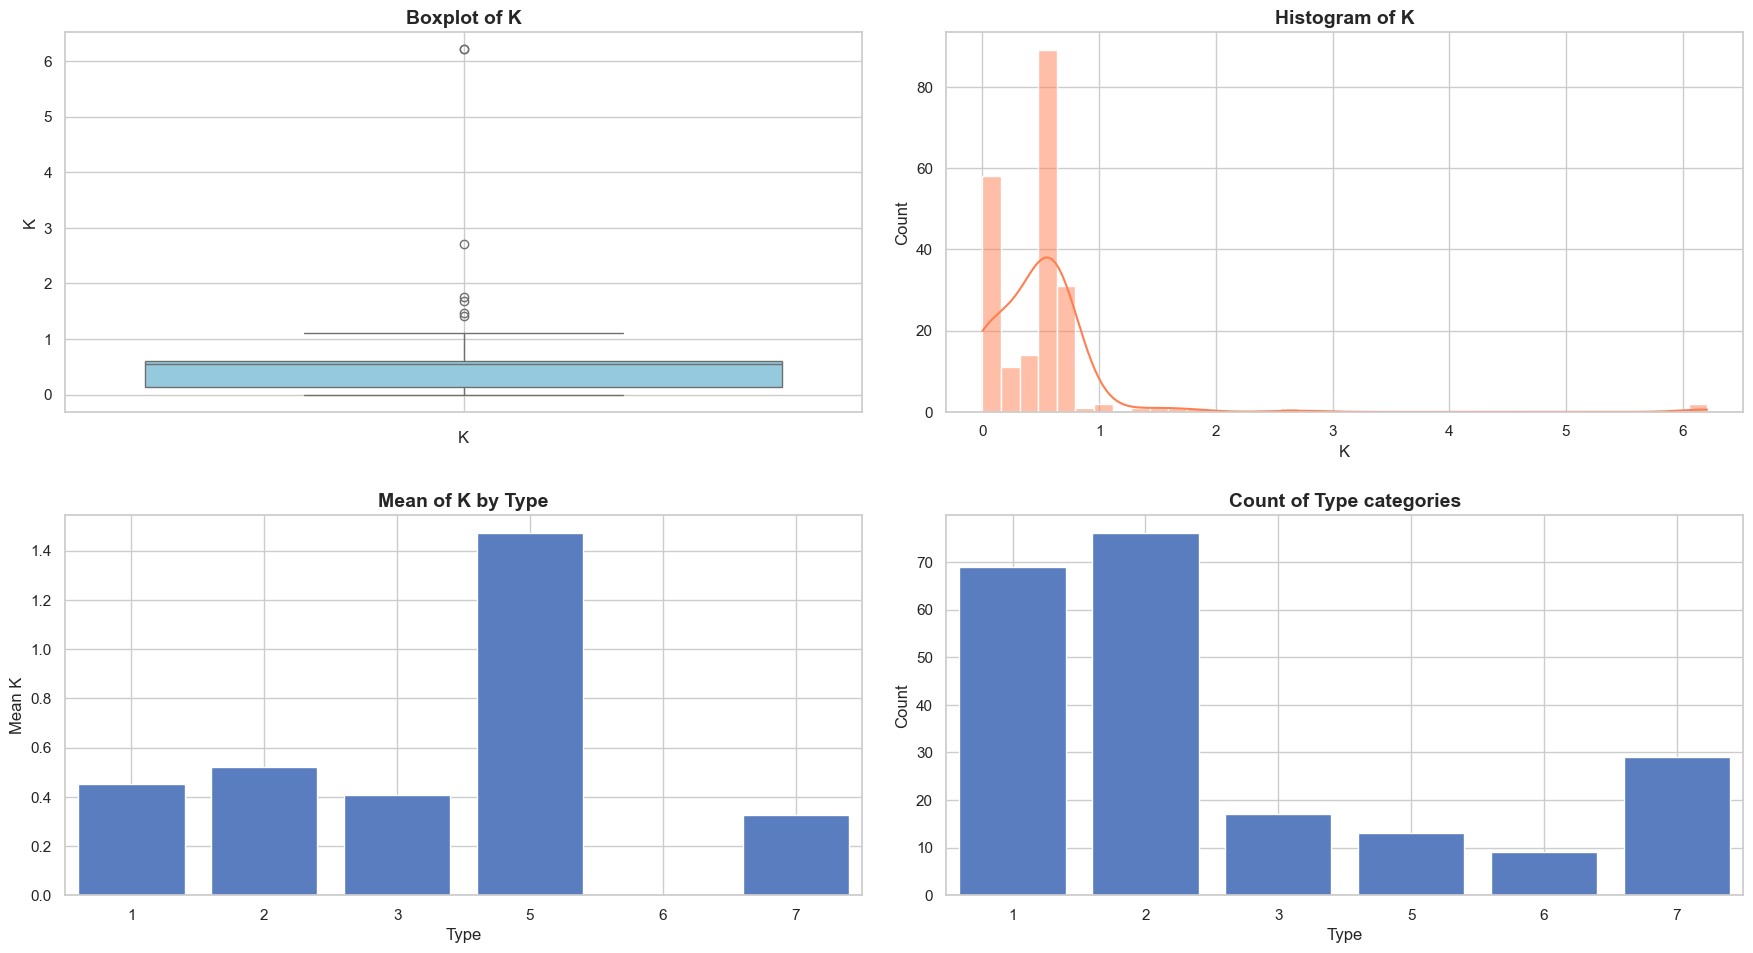

Scatter Plot of RI vs K:
  - Correlation coefficient: -0.29
Scatter Plot of Na vs K:
  - Correlation coefficient: -0.26
Scatter Plot of Mg vs K:
  - Correlation coefficient: 0.01
Scatter Plot of Al vs K:
  - Correlation coefficient: 0.32
Scatter Plot of Si vs K:
  - Correlation coefficient: -0.20
Scatter Plot of Ca vs K:
  - Correlation coefficient: -0.32
Scatter Plot of Ba vs K:
  - Correlation coefficient: -0.04
Scatter Plot of Fe vs K:
  - Correlation coefficient: -0.01


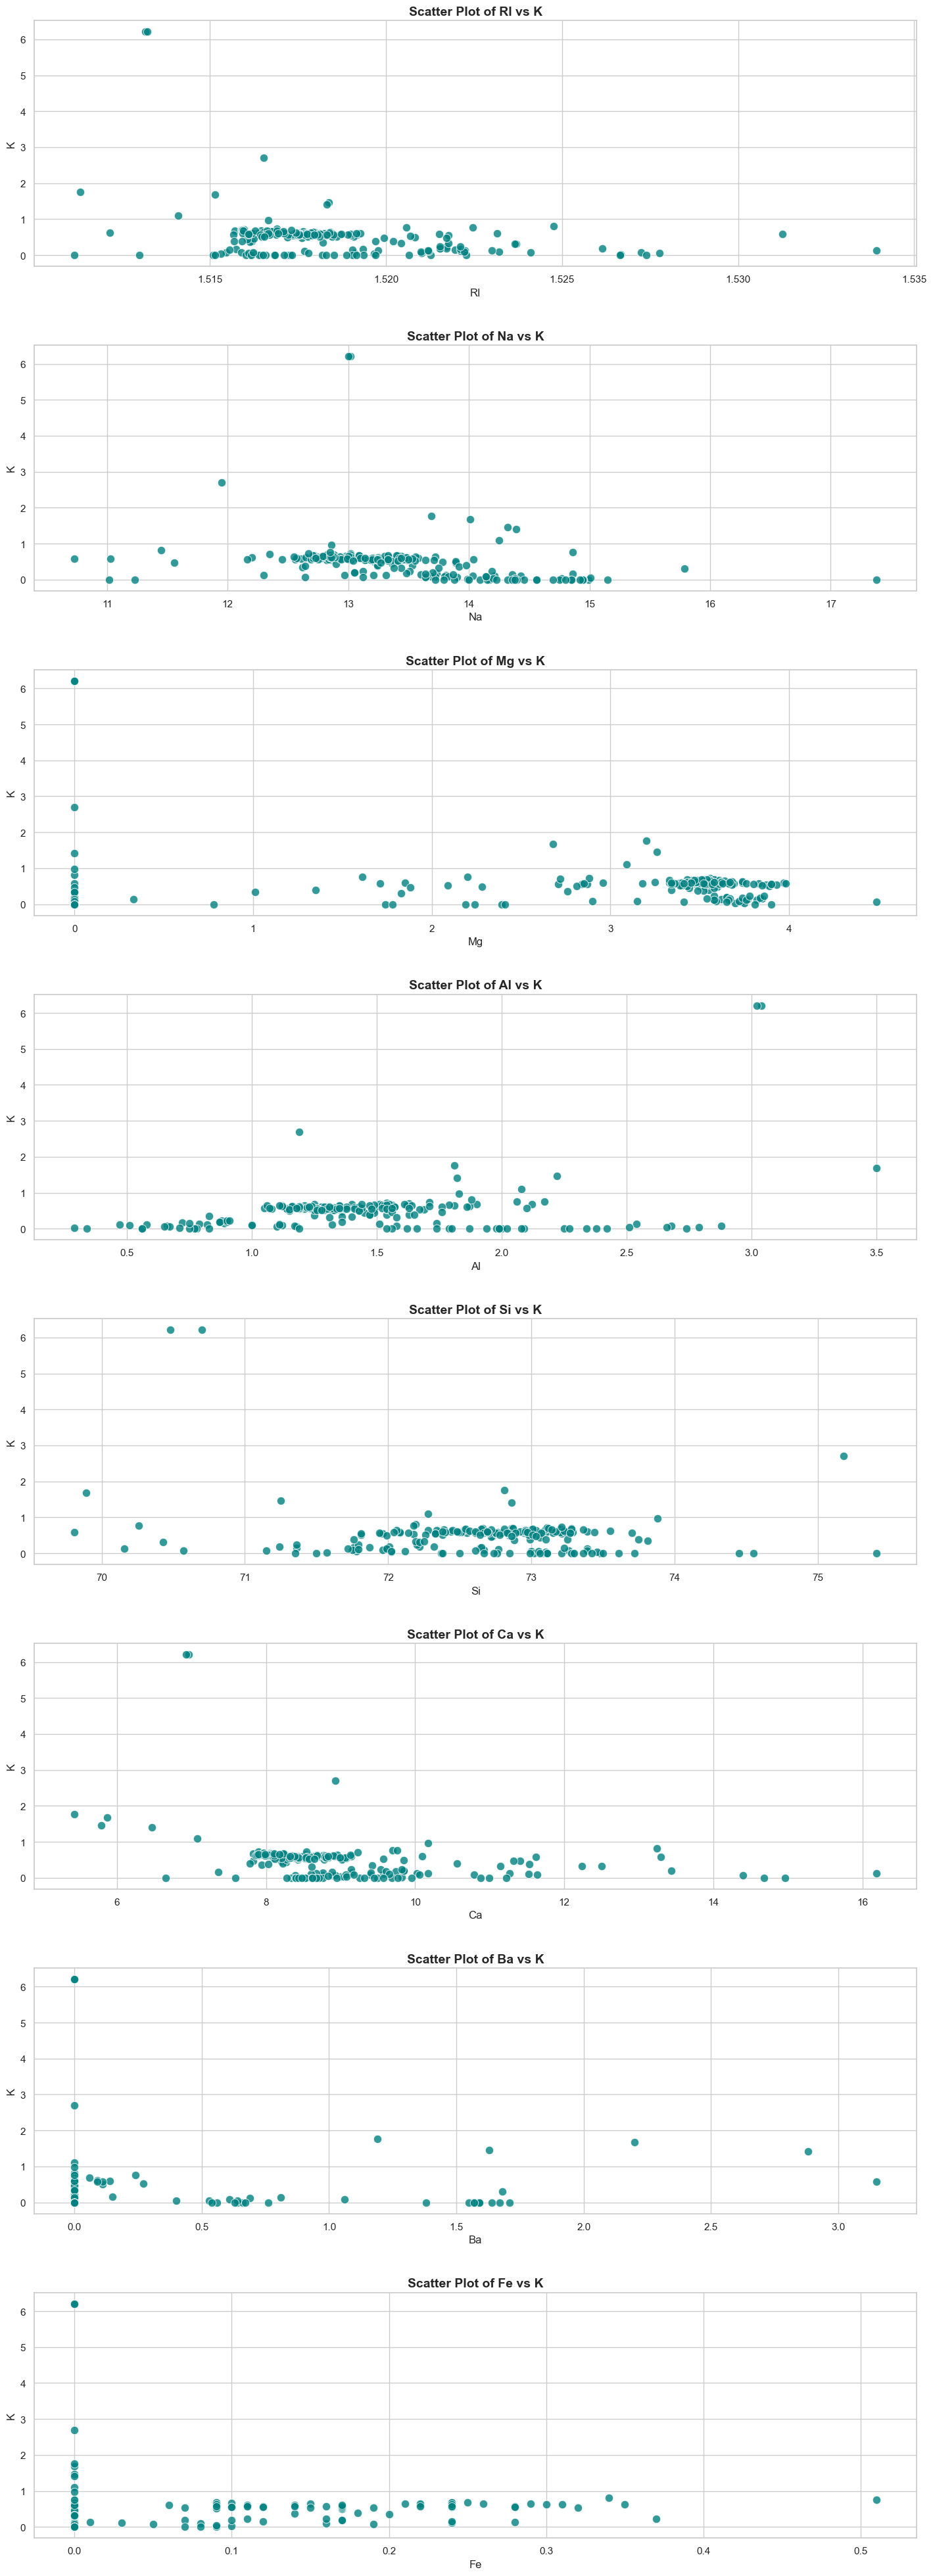

In [14]:
EDA(data,'K','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - K values range from 0.00 to 6.21, with a mean of 0.50.
  - The distribution shows that 75% of the values fall between 0.13 and 0.61.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that K values are most frequently found in the range of 0.00 to 0.62, with very few observations in higher bins.

### Mean Values by Type:

- **Variability:**
  - The mean K value is highest for Type 5 (1.47) and lowest for Type 6 (0.00). This suggests variability in K levels depending on the type.



- **Moderate Negative Correlation:**
  - Potassium (K) with RI: -0.29
  - Potassium (K) with Sodium (Na): -0.26
  - Calcium (Ca) with K: -0.32

- **Weak Negative Correlation:**
  - Potassium (K) with Silicon (Si): -0.20
  - Potassium (K) with Barium (Ba): -0.04
  - Potassium (K) with Iron (Fe): -0.01

- **Weak Positive Correlation:**
  - Potassium (K) with Aluminum (Al): 0.32
  - Magnesium (Mg) with K: 0.01

Boxplot Values:
  - Mean: 8.95
  - 25th Percentile: 8.24
  - 50th Percentile (Median): 8.60
  - 75th Percentile: 9.15
  - Max: 16.19
  - Min: 5.43
Mean Values of Ca by Type:
  - Type: 1.0, Mean Ca: 8.79
  - Type: 2.0, Mean Ca: 9.07
  - Type: 3.0, Mean Ca: 8.78
  - Type: 5.0, Mean Ca: 10.12
  - Type: 6.0, Mean Ca: 9.36
  - Type: 7.0, Mean Ca: 8.49


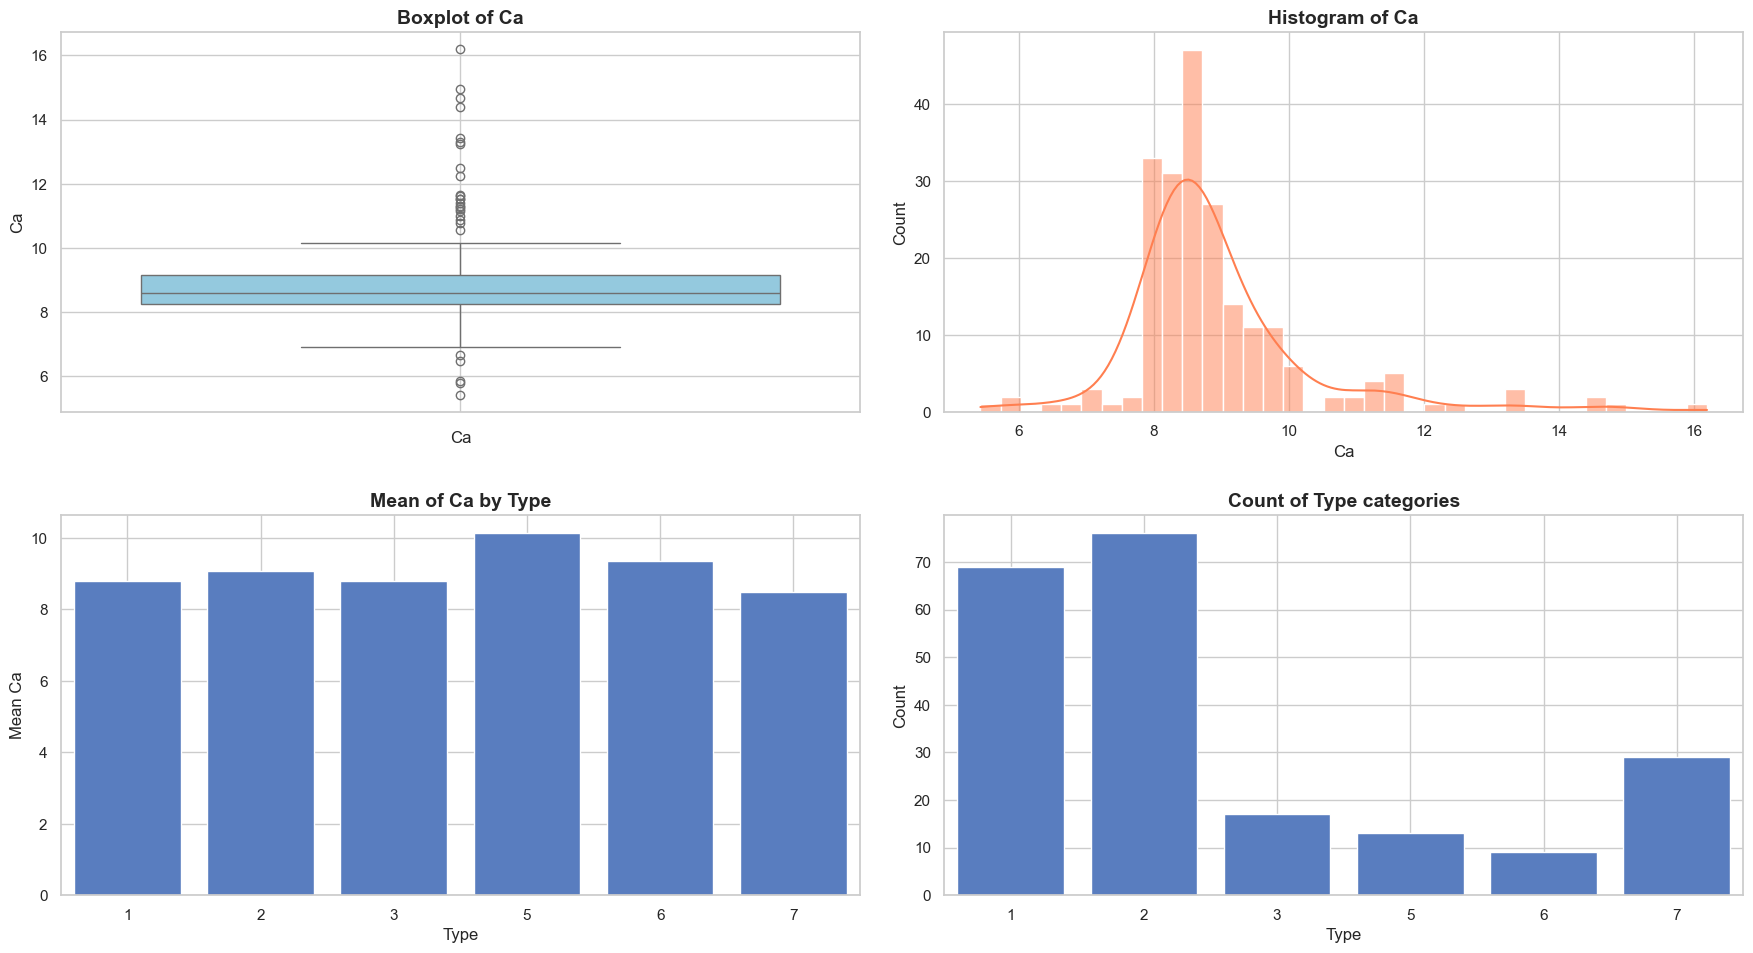

Scatter Plot of RI vs Ca:
  - Correlation coefficient: 0.81
Scatter Plot of Na vs Ca:
  - Correlation coefficient: -0.28
Scatter Plot of Mg vs Ca:
  - Correlation coefficient: -0.45
Scatter Plot of Al vs Ca:
  - Correlation coefficient: -0.26
Scatter Plot of Si vs Ca:
  - Correlation coefficient: -0.21
Scatter Plot of K vs Ca:
  - Correlation coefficient: -0.32
Scatter Plot of Ba vs Ca:
  - Correlation coefficient: -0.11
Scatter Plot of Fe vs Ca:
  - Correlation coefficient: 0.13


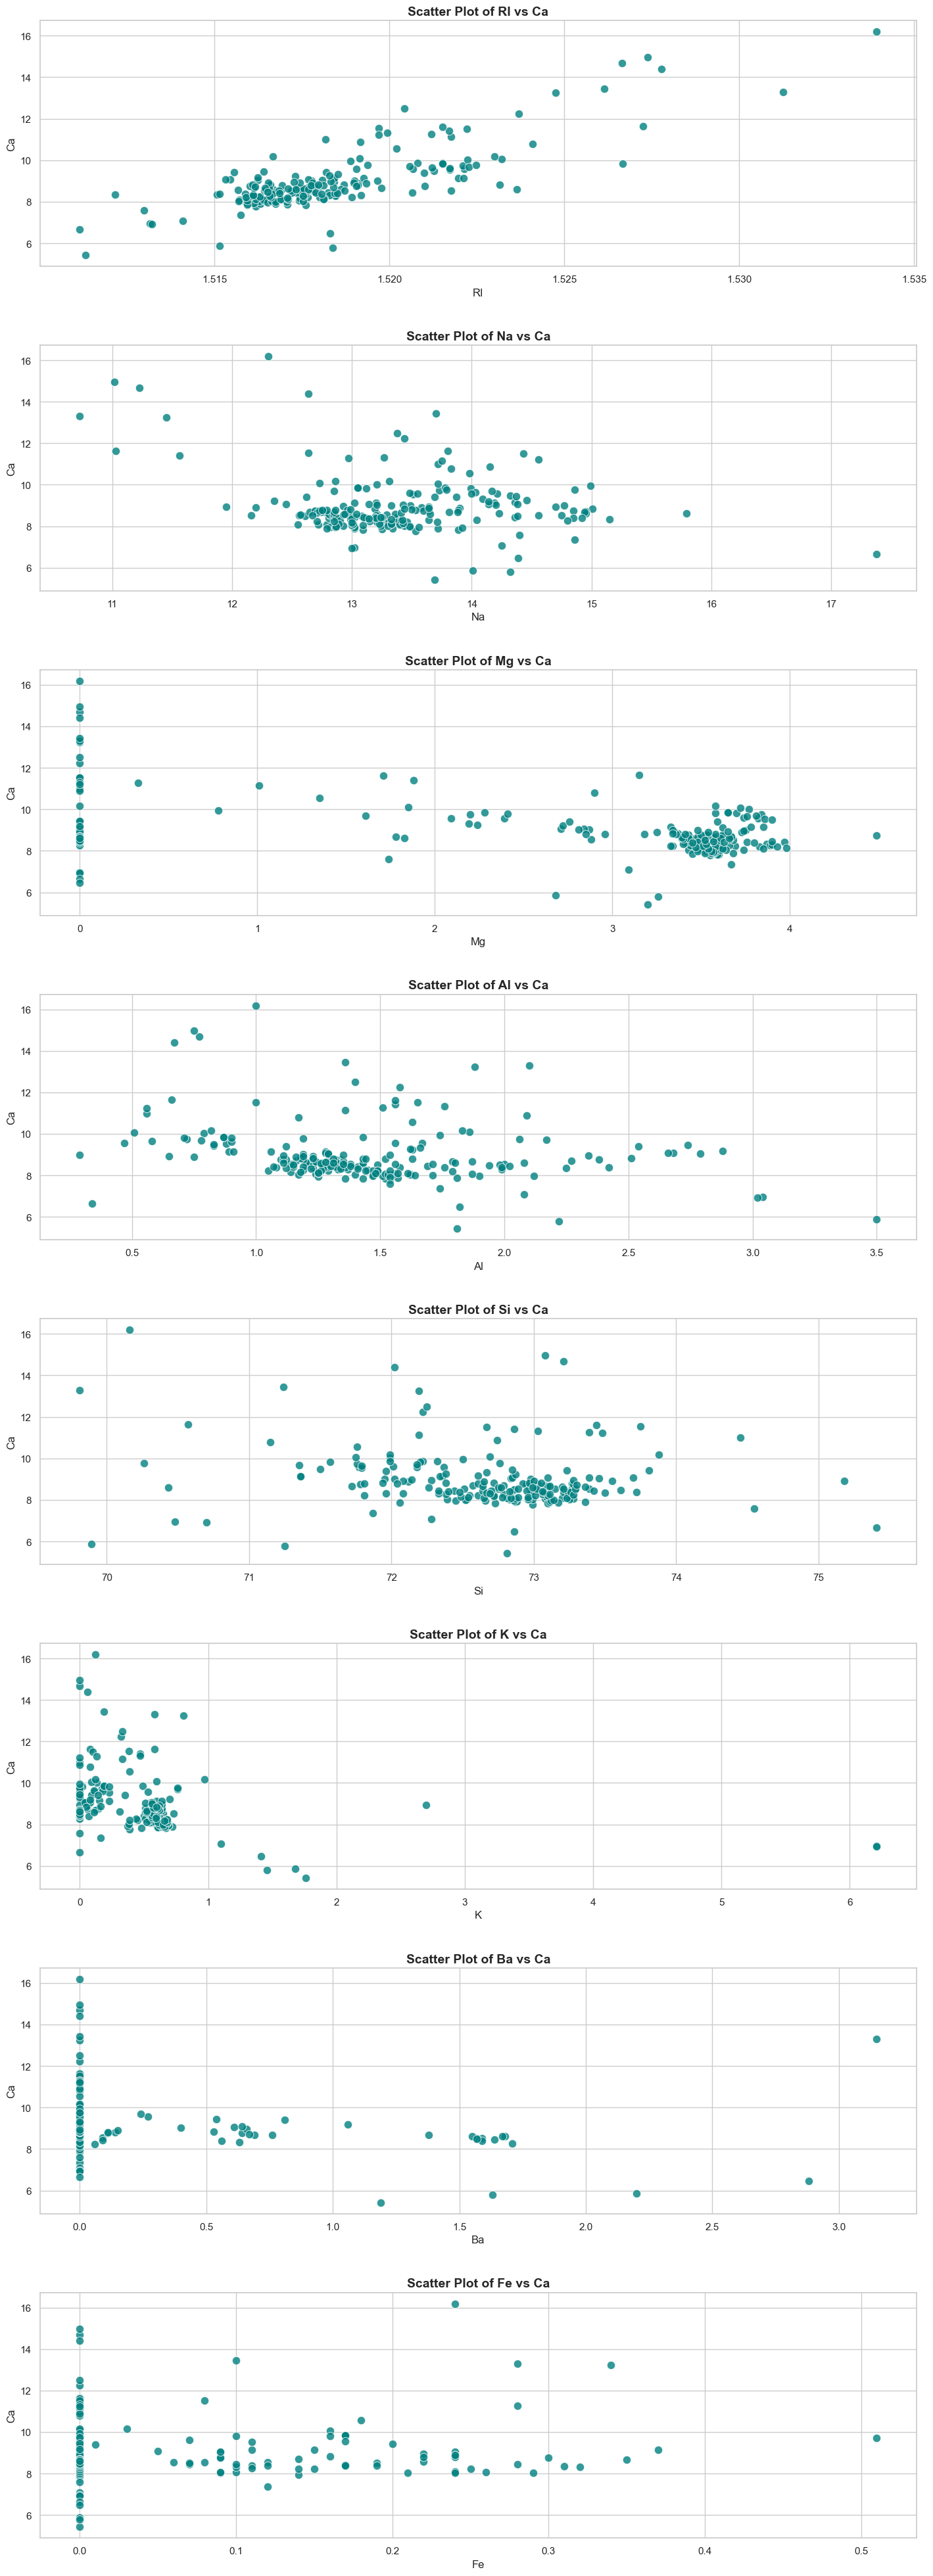

In [15]:
EDA(data,'Ca','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Ca values range from 5.43 to 16.19, with a mean of 8.95.
  - The distribution shows that 75% of the values fall between 8.24 and 9.15.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Ca values are most frequently found in the range of 7.58 to 9.73, with fewer observations in the higher bins.

### Mean Values by Type:

- **Variability:**
  - The mean Ca value is highest for Type 5 (10.12) and lowest for Type 7 (8.49). This suggests variability in Ca levels depending on the type.



- **Strong Positive Correlation:**
  - Calcium (Ca) with RI: 0.81

- **Moderate Negative Correlation:**
  - Calcium (Ca) with Magnesium (Mg): -0.45
  - Calcium (Ca) with Potassium (K): -0.32

- **Weak Negative Correlation:**
  - Calcium (Ca) with Sodium (Na): -0.28
  - Calcium (Ca) with Aluminum (Al): -0.26
  - Calcium (Ca) with Silicon (Si): -0.21
  - Calcium (Ca) with Barium (Ba): -0.11

- **Weak Positive Correlation:**
  - Calcium (Ca) with Iron (Fe): 0.13

Boxplot Values:
  - Mean: 0.18
  - 25th Percentile: 0.00
  - 50th Percentile (Median): 0.00
  - 75th Percentile: 0.00
  - Max: 3.15
  - Min: 0.00
Mean Values of Ba by Type:
  - Type: 1.0, Mean Ba: 0.01
  - Type: 2.0, Mean Ba: 0.05
  - Type: 3.0, Mean Ba: 0.01
  - Type: 5.0, Mean Ba: 0.19
  - Type: 6.0, Mean Ba: 0.00
  - Type: 7.0, Mean Ba: 1.04


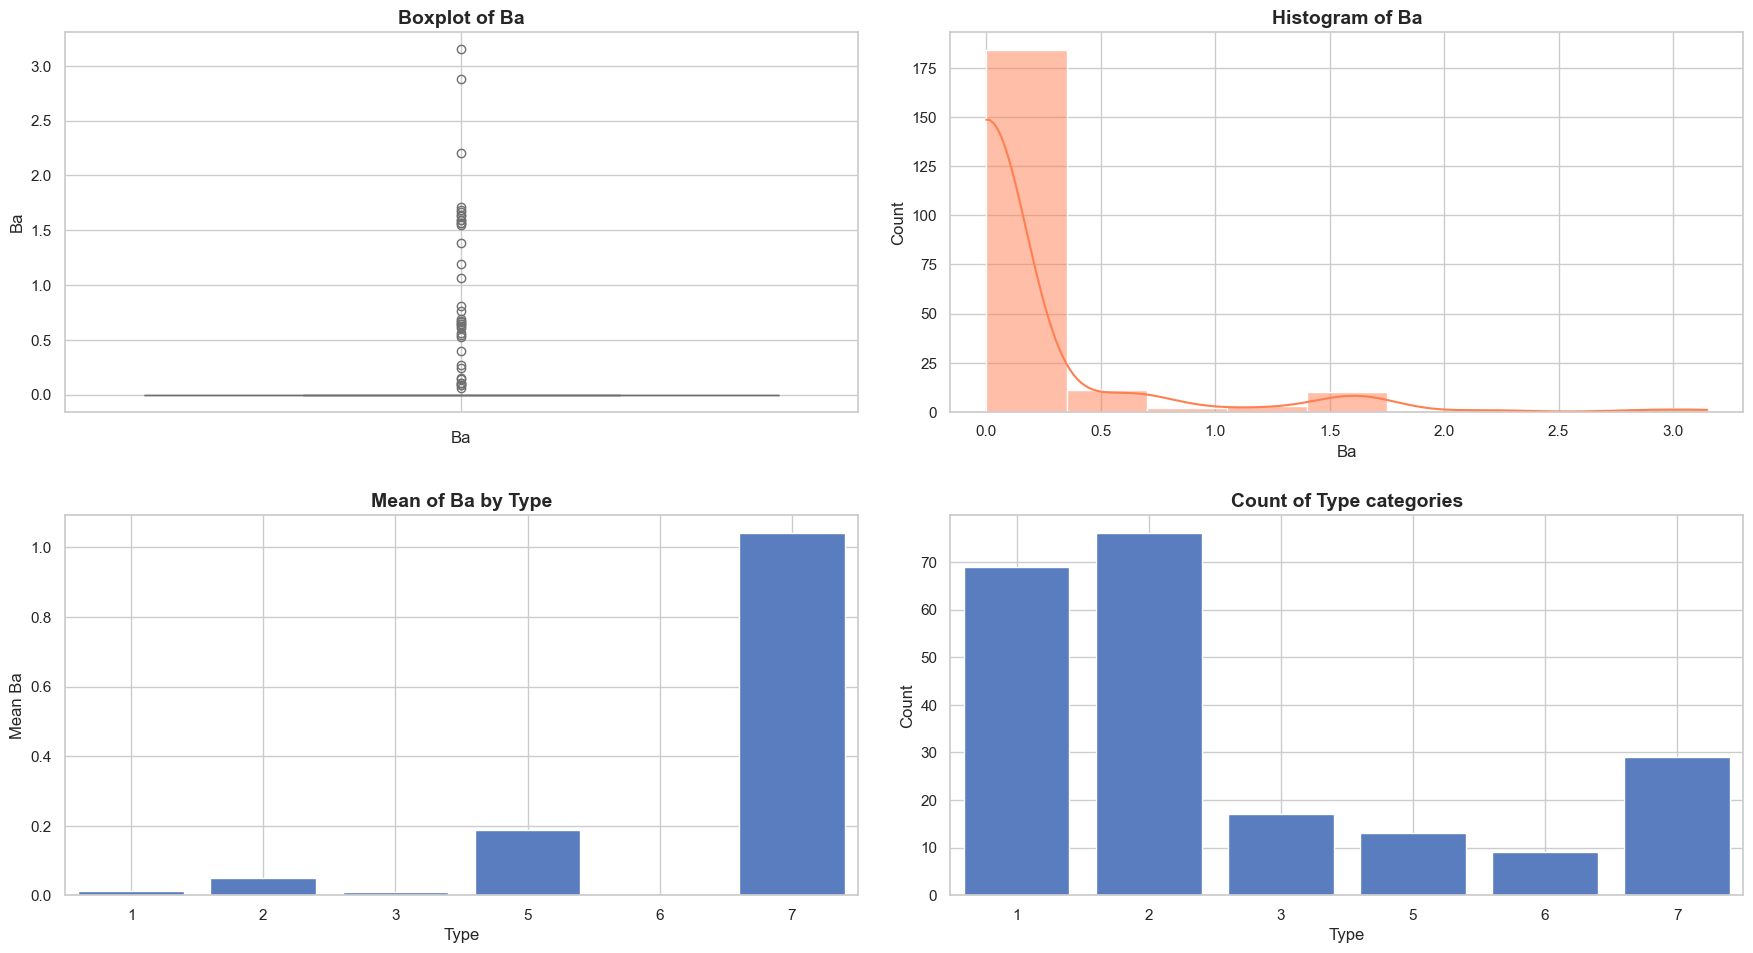

Scatter Plot of RI vs Ba:
  - Correlation coefficient: 0.00
Scatter Plot of Na vs Ba:
  - Correlation coefficient: 0.33
Scatter Plot of Mg vs Ba:
  - Correlation coefficient: -0.49
Scatter Plot of Al vs Ba:
  - Correlation coefficient: 0.48
Scatter Plot of Si vs Ba:
  - Correlation coefficient: -0.10
Scatter Plot of K vs Ba:
  - Correlation coefficient: -0.04
Scatter Plot of Ca vs Ba:
  - Correlation coefficient: -0.11
Scatter Plot of Fe vs Ba:
  - Correlation coefficient: -0.06


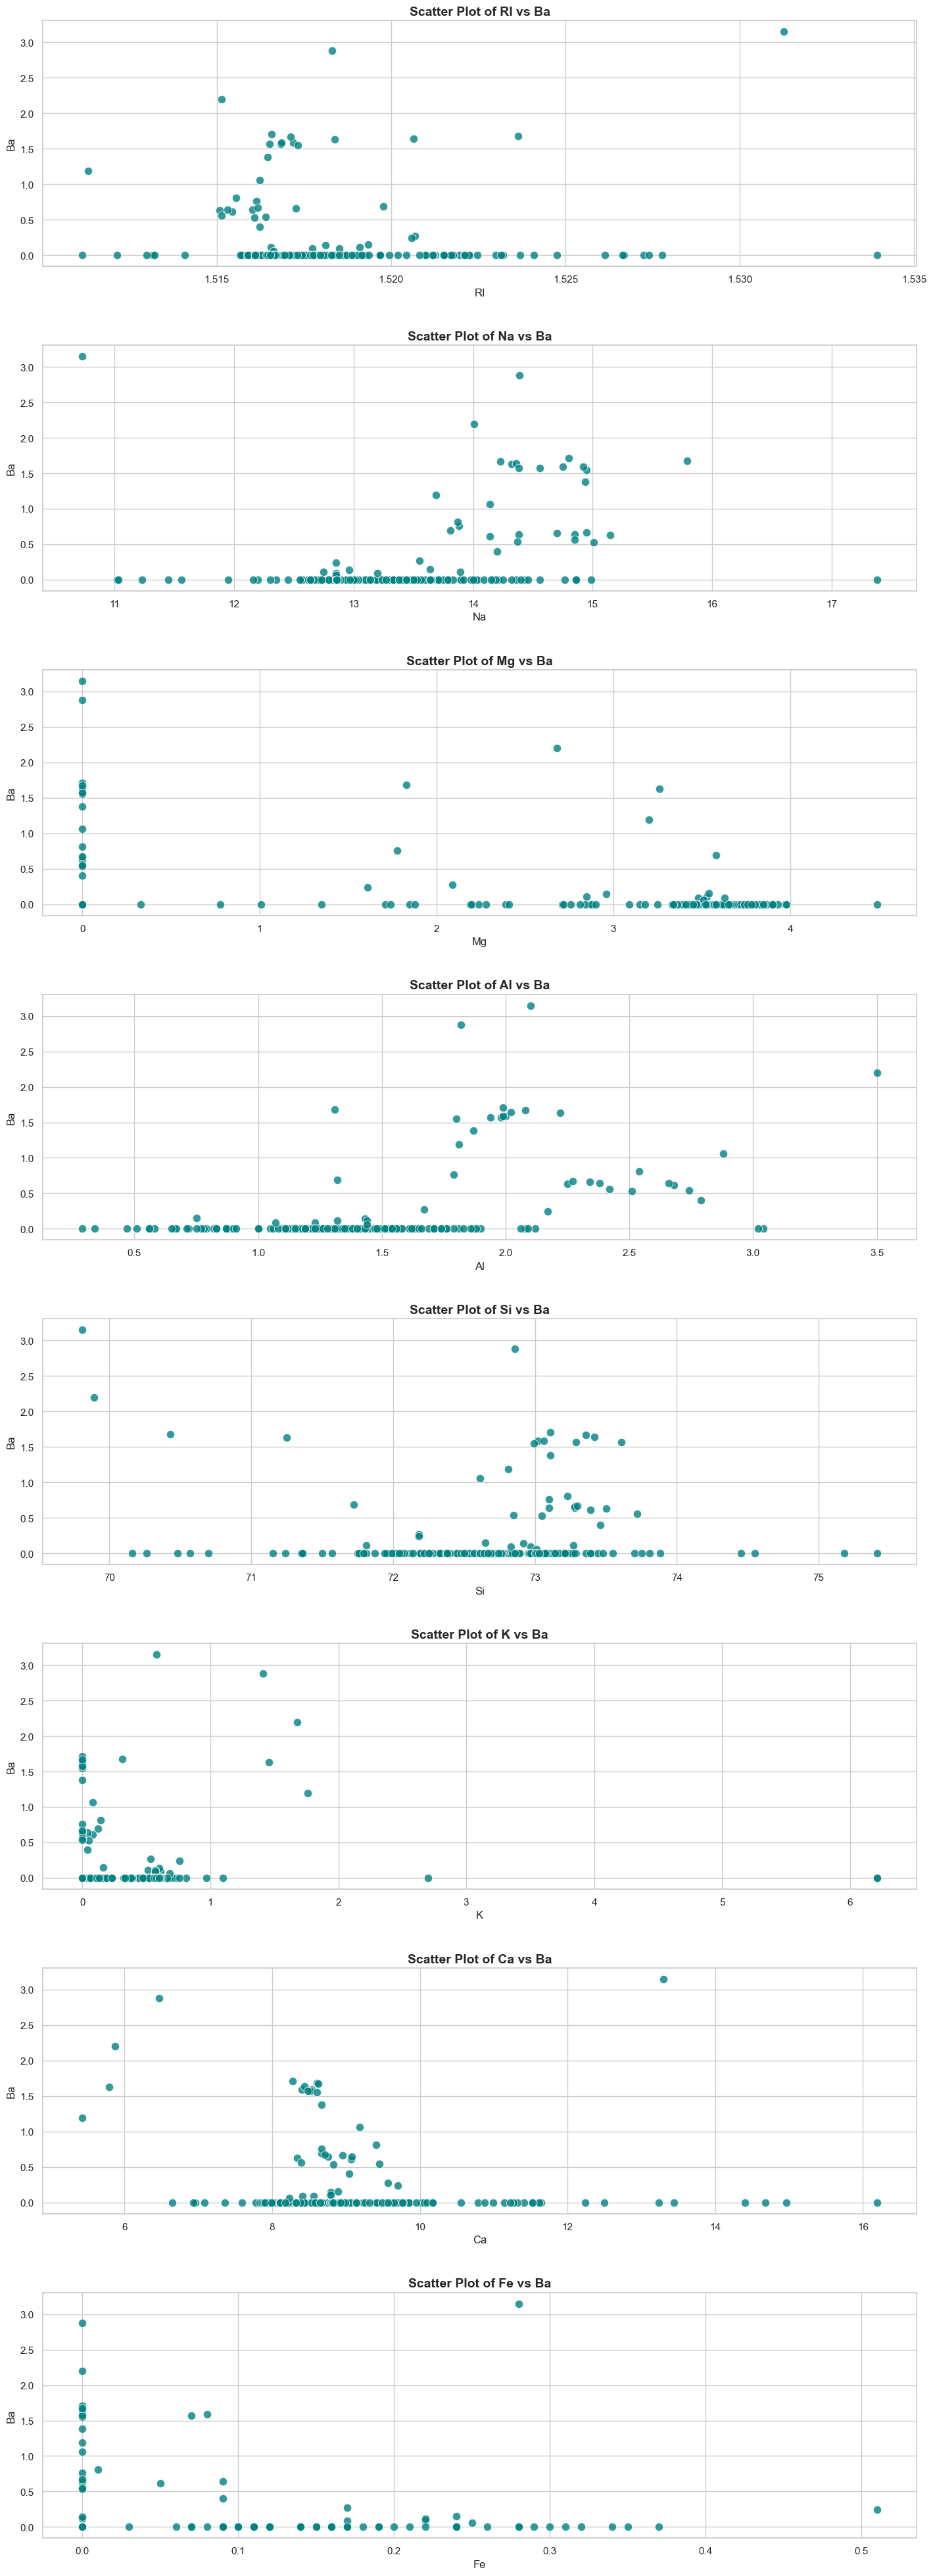

In [16]:
EDA(data,'Ba','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Ba values range from 0.00 to 3.15, with a mean of 0.18.
  - The distribution shows that 75% of the values fall between 0.00 and 0.00, indicating that many values are clustered at the lower end.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Ba values are most frequently found in the range of -0.004 to 0.315, with significantly fewer observations in the higher bins.

### Mean Values by Type:

- **Variability:**
  - The mean Ba value is highest for Type 7 (1.04) and lowest for Type 1 (0.01). This suggests that Ba levels vary considerably depending on the type.



- **Strong Positive Correlation:**
  - None

- **Moderate Positive Correlation:**
  - Barium (Ba) with Sodium (Na): 0.33
  - Barium (Ba) with Aluminum (Al): 0.48

- **Moderate Negative Correlation:**
  - Barium (Ba) with Magnesium (Mg): -0.49

- **Weak Positive Correlation:**
  - Barium (Ba) with Iron (Fe): -0.06

- **Weak Negative Correlation:**
  - Barium (Ba) with Calcium (Ca): -0.11
  - Barium (Ba) with Silicon (Si): -0.10
  - Barium (Ba) with Potassium (K): -0.04

- **No Correlation:**
  - Barium (Ba) with RI: 0.00

Boxplot Values:
  - Mean: 0.06
  - 25th Percentile: 0.00
  - 50th Percentile (Median): 0.00
  - 75th Percentile: 0.10
  - Max: 0.51
  - Min: 0.00
Mean Values of Fe by Type:
  - Type: 1.0, Mean Fe: 0.06
  - Type: 2.0, Mean Fe: 0.08
  - Type: 3.0, Mean Fe: 0.06
  - Type: 5.0, Mean Fe: 0.06
  - Type: 6.0, Mean Fe: 0.00
  - Type: 7.0, Mean Fe: 0.01


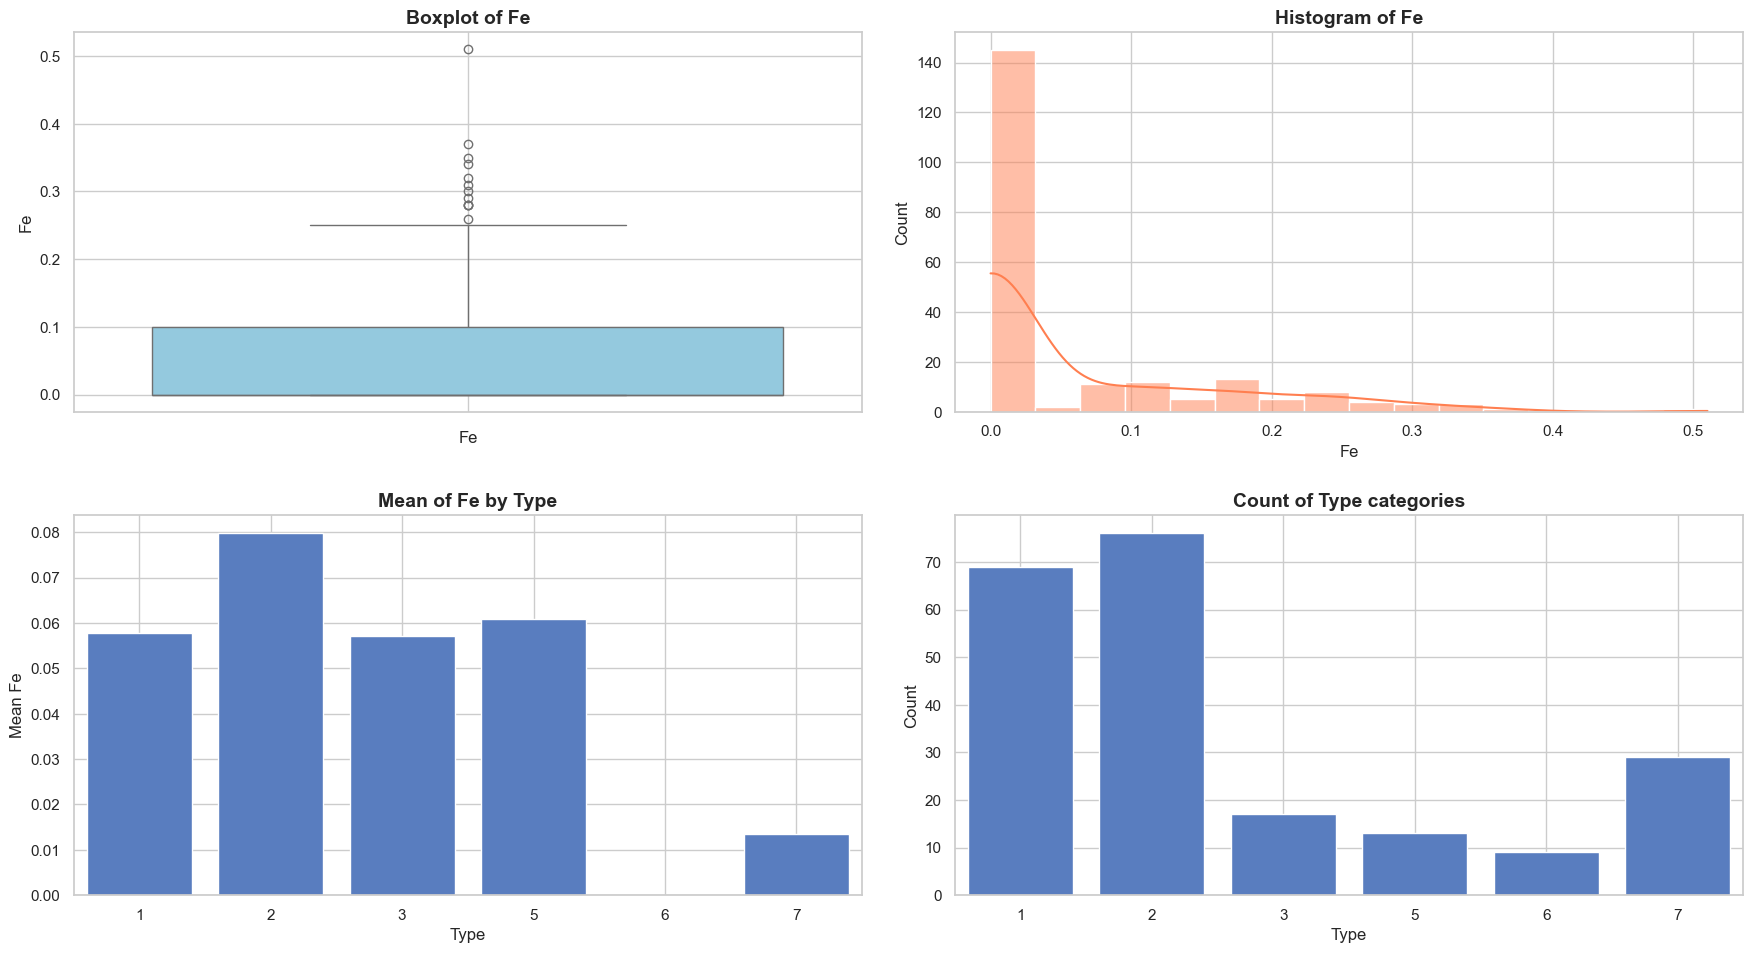

Scatter Plot of RI vs Fe:
  - Correlation coefficient: 0.15
Scatter Plot of Na vs Fe:
  - Correlation coefficient: -0.24
Scatter Plot of Mg vs Fe:
  - Correlation coefficient: 0.09
Scatter Plot of Al vs Fe:
  - Correlation coefficient: -0.08
Scatter Plot of Si vs Fe:
  - Correlation coefficient: -0.10
Scatter Plot of K vs Fe:
  - Correlation coefficient: -0.01
Scatter Plot of Ca vs Fe:
  - Correlation coefficient: 0.13
Scatter Plot of Ba vs Fe:
  - Correlation coefficient: -0.06


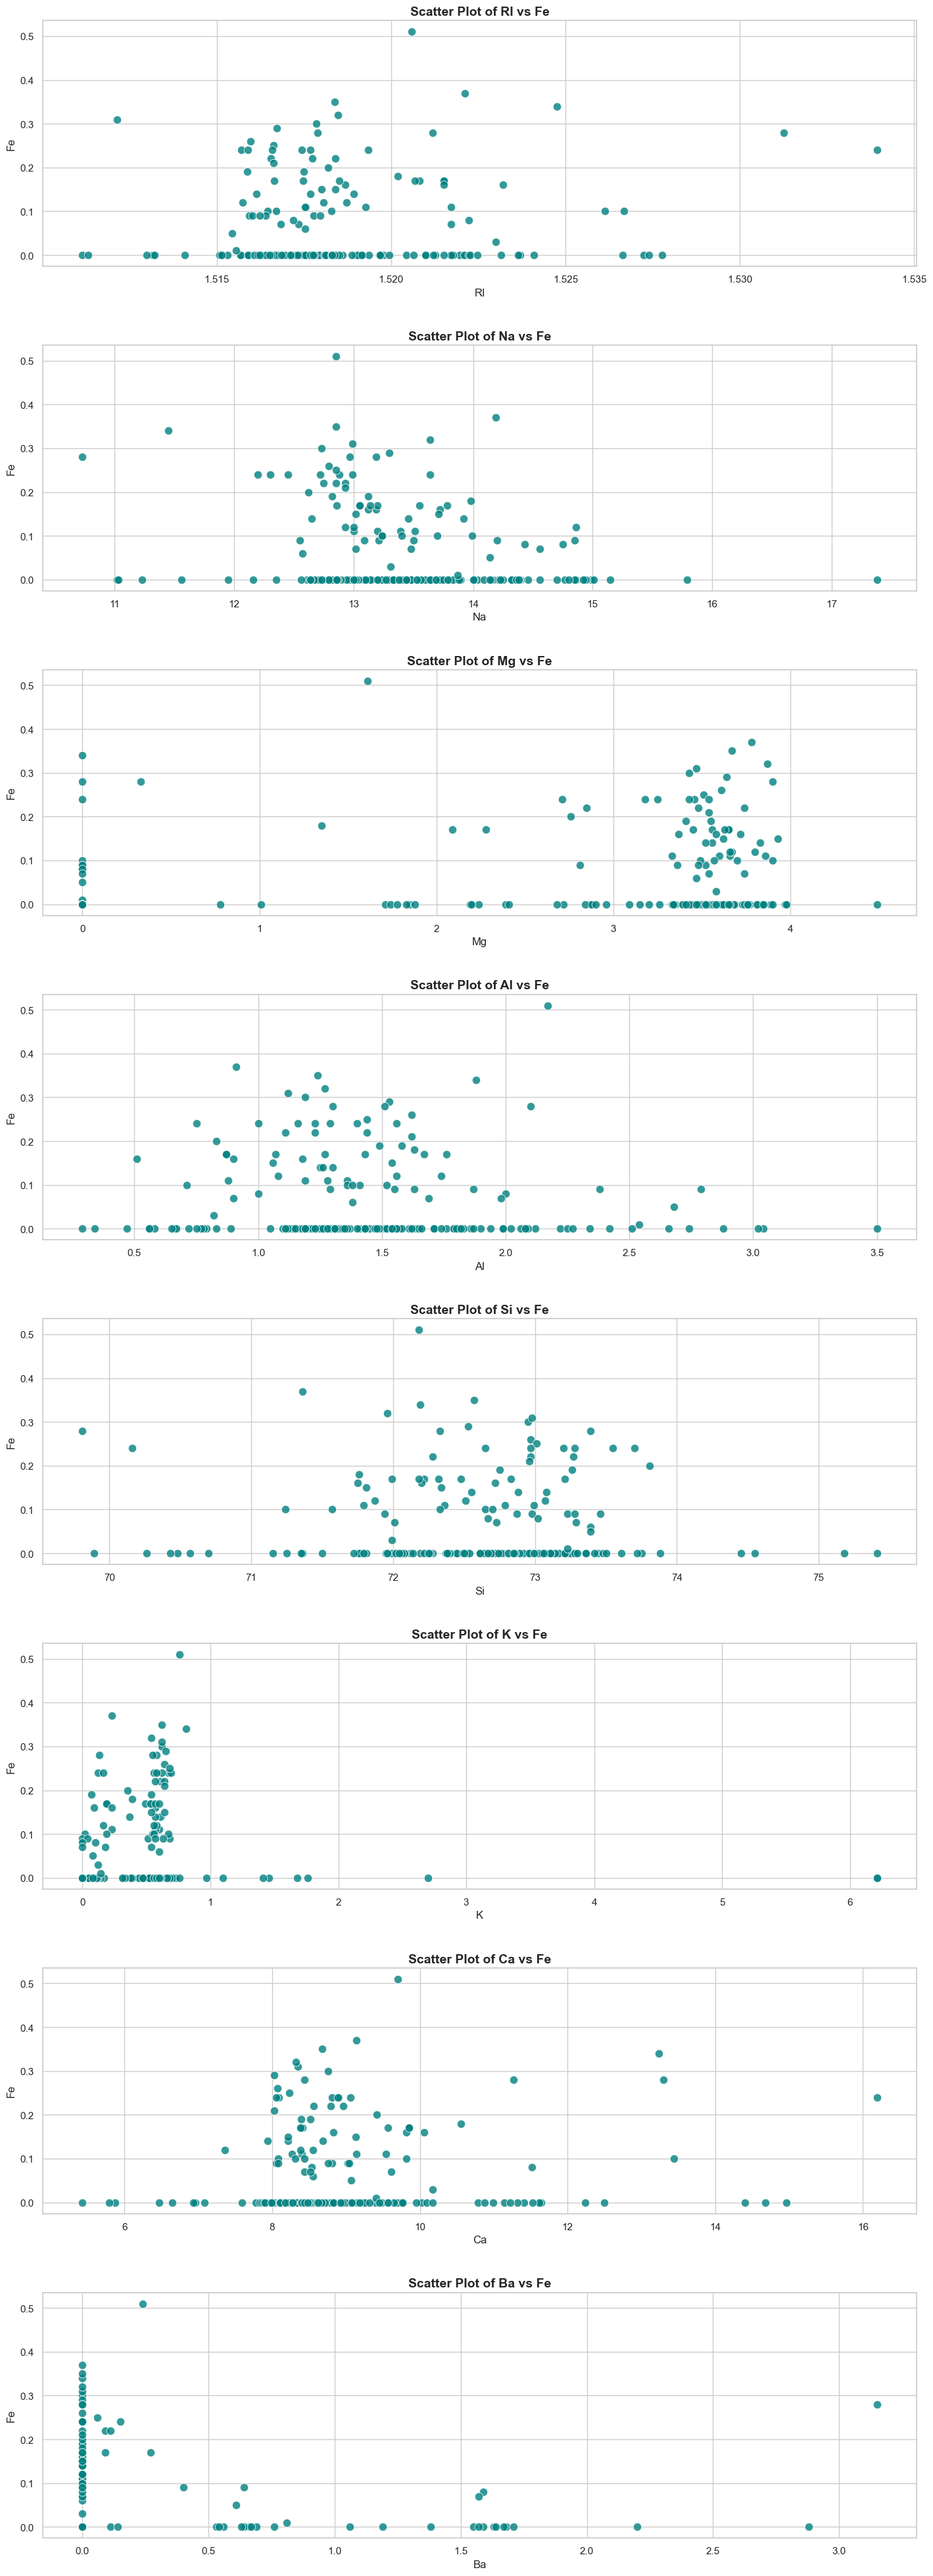

In [17]:
EDA(data,'Fe','Type')

### Boxplot Analysis:

- **Range and Summary:**
  - Fe values range from 0.00 to 0.51, with a mean of 0.06.
  - The distribution shows that 75% of the values fall between 0.00 and 0.10, indicating a concentration of lower values.

### Histogram Analysis:

- **Distribution:**
  - The histogram indicates that Fe values are most frequently found in the range of -0.001 to 0.051, with fewer observations in higher bins.

### Mean Values by Type:

- **Variability:**
  - The mean Fe value is highest for Type 2 (0.08) and lowest for Type 6 (0.00). This suggests that Fe levels vary slightly depending on the type, with some types having a notably lower average Fe content.



- **Weak Positive Correlation:**
  - Iron (Fe) with RI: 0.15
  - Iron (Fe) with Calcium (Ca): 0.13
  - Iron (Fe) with Magnesium (Mg): 0.09

- **Weak Negative Correlation:**
  - Iron (Fe) with Sodium (Na): -0.24
  - Iron (Fe) with Barium (Ba): -0.06
  - Iron (Fe) with Silicon (Si): -0.10
  - Iron (Fe) with Aluminum (Al): -0.08
  - Iron (Fe) with Potassium (K): -0.01

In [18]:
data.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [19]:
def classifier(X_train,y_train,X_test,y_test,model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return model

In [96]:
X = data.drop(columns='Type')
y = data['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
classifier(X_train,y_train,X_test,y_test,rfc)

Classification Report:
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        10
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.86        43
   macro avg       0.90      0.84      0.85        43
weighted avg       0.88      0.86      0.86        43

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [22]:
params = {'n_estimators': [50, 100, 150],
          'criterion':['entropy','gini'],
          'max_features':[4,5,6],
          'ccp_alpha':[0.0,0.1,0.2,0.3]
         }

In [23]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=params, 
                           cv=5,  # Number of cross-validation folds
                           scoring='accuracy',  # Evaluation metric
                           verbose=2,  # Print progress
                           n_jobs=-1)  # Use all available cores


In [24]:
grid = grid_search.fit(X_train,y_train)
grid.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.7647058823529411

In [25]:
grid.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_features': 5, 'n_estimators': 100}

In [26]:
rfc = RandomForestClassifier(ccp_alpha=0.1,criterion='entropy',max_depth=4,n_estimators=150)
classifier(X_train,y_train,X_test,y_test,rfc)

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.90      0.78        10
           2       0.52      0.73      0.61        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       1.00      0.78      0.88         9

    accuracy                           0.65        43
   macro avg       0.54      0.46      0.46        43
weighted avg       0.62      0.65      0.61        43

Confusion Matrix:
[[ 9  1  0  0  0  0]
 [ 3 11  0  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  2  0  0  1  0]
 [ 0  2  0  0  0  7]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4,
                       n_estimators=150)

In [92]:
X = data.drop(columns='Type')
y = data['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
pca = PCA(n_components=1)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [94]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
classifier(X_train,y_train,X_test,y_test,rfc)

Classification Report:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.81        43
   macro avg       0.88      0.81      0.82        43
weighted avg       0.84      0.81      0.81        43

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 3 11  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]


RandomForestClassifier(criterion='entropy', n_estimators=50)

In [119]:
import numpy as np
import pandas as pd
from scipy import stats

def remove_outliers(df, numerical_features, target_column, threshold=3):
   
    # Ensure the target column is not included in numerical_features
    if target_column in numerical_features:
        raise ValueError("Target column should not be included in numerical_features list.")
    
    # Calculate Z-scores for numerical features
    z_scores = stats.zscore(df[numerical_features])
    
    # Calculate absolute Z-scores
    abs_z_scores = np.abs(z_scores)
    
    # Determine outliers based on the threshold
    outliers = (abs_z_scores > threshold).any(axis=1)
    
    # Keep rows where outliers is False
    df_clean = df[~outliers]
    
    return df_clean



    Remove outliers from the DataFrame based on Z-score for numerical features,
    while retaining the target column.

    Parameters:
    - df: pandas DataFrame containing the data.
    - numerical_features: list of columns in the DataFrame that are numerical.
    - target_column: name of the column containing the target variable.
    - threshold: Z-score threshold to define outliers (default is 3).

    Returns:
    - df_clean: DataFrame with outliers removed, including the target column.

In [120]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
data_clean = remove_outliers(data,features,'Type')

In [121]:
data.shape

(213, 10)

In [122]:
data_clean.shape

(193, 10)

In [123]:
X = data_clean.drop(columns='Type')
y = data_clean['Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [118]:
rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
classifier(X_train,y_train,X_test,y_test,rfc)

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.85      0.92      0.88        12
           3       1.00      0.17      0.29         6
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           0.82        39
   macro avg       0.93      0.84      0.83        39
weighted avg       0.85      0.82      0.79        39

Confusion Matrix:
[[13  1  0  0  0  0]
 [ 1 11  0  0  0  0]
 [ 4  1  1  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  1]]


RandomForestClassifier(criterion='entropy', n_estimators=50)

# Explain Bagging and Boosting methods. How is it different from each other.


**Bagging** and **Boosting** are two powerful ensemble learning techniques used to improve the performance and accuracy of machine learning models, particularly decision trees. While they both aim to reduce variance and bias in models, they work in different ways and serve different purposes. Here's an explanation of each method and their differences:

### **Bagging (Bootstrap Aggregating)**

**Bagging** is an ensemble technique that aims to reduce variance and prevent overfitting in a model by training multiple models on different subsets of the dataset and averaging their predictions.

#### Key Features of Bagging:
1. **Random Sampling with Replacement**: Bagging uses **bootstrapping**, where different subsets of the data are generated by randomly sampling the training set **with replacement**. This means that some samples might be used multiple times, while others may not be used at all.
  
2. **Parallel Training**: The models (often decision trees) are trained **independently** on different bootstrapped subsets of the data. This parallel approach makes bagging computationally efficient.

3. **Aggregation**: The final prediction is made by **aggregating** the outputs of all models. For classification, the majority vote is taken; for regression, the average of predictions is used.

4. **Reduces Variance**: By combining the predictions of multiple models, bagging reduces the model's variance, making it more stable and less likely to overfit.

#### Example: **Random Forest**
- Random Forest is a popular algorithm that uses bagging with decision trees as base learners. Each tree is trained on a different bootstrapped subset, and the final prediction is based on the aggregate of all trees.

### **Boosting**

**Boosting** is another ensemble technique that aims to reduce bias and variance by training a sequence of weak models (usually decision trees) where each new model tries to correct the errors made by the previous models.

#### Key Features of Boosting:
1. **Sequential Learning**: In boosting, models are trained **sequentially**. Each new model focuses on the mistakes made by the previous models, giving more weight to the incorrectly predicted instances.

2. **Weighted Data**: Boosting adjusts the weights of incorrectly classified samples, so that subsequent models focus more on these difficult cases. This allows boosting to improve performance iteratively.

3. **Combining Predictions**: The predictions from all models are combined, but unlike bagging, the combination is **weighted** based on the accuracy of each model.

4. **Reduces Bias and Variance**: Boosting is effective at reducing both bias (underfitting) and variance (overfitting), making the model more accurate.

#### Example: **AdaBoost, Gradient Boosting**
- **AdaBoost** adjusts the weights of misclassified instances after each iteration, and subsequent models focus on those hard-to-classify examples.
- **Gradient Boosting** trains models sequentially by optimizing a loss function, gradually improving the model by minimizing errors.

### **Differences Between Bagging and Boosting**

| **Aspect**               | **Bagging**                            | **Boosting**                              |
|--------------------------|----------------------------------------|-------------------------------------------|
| **Objective**            | Reduce variance                        | Reduce bias and variance                  |
| **Model Training**       | Models are trained independently in parallel | Models are trained sequentially           |
| **Data Sampling**        | Random sampling with replacement       | No random sampling; uses entire dataset with weights adjusted after each iteration |
| **Emphasis on Errors**   | Equal weight to all instances           | Focuses on correcting mistakes of previous models by re-weighting instances |
| **Aggregation Method**   | Average or majority voting              | Weighted sum of predictions               |
| **Overfitting**          | Less prone to overfitting               | More prone to overfitting, but can be regularized |
| **Examples**             | Random Forest                          | AdaBoost, Gradient Boosting, XGBoost      |

### **Summary**:
- **Bagging** works by training multiple models in parallel on bootstrapped data and reduces overfitting (variance). The models are combined through majority voting or averaging.
- **Boosting** builds models sequentially, with each new model focusing on correcting the mistakes of the previous one. It is more effective in reducing bias and variance but can be prone to overfitting if not properly tuned.

Both techniques are widely used in practice and form the backbone of many powerful algorithms like Random Forest (bagging) and XGBoost (boosting).

# Explain how to handle imbalance in the data.

Handling imbalanced data is crucial when dealing with classification problems where one class significantly outweighs the others. In such cases, standard models may be biased toward the majority class, leading to poor performance on the minority class. Here are some techniques to handle imbalanced data:

### 1. **Resampling Techniques**
   - **Oversampling**: Increase the number of minority class examples by duplicating them or generating synthetic data.
     - **SMOTE (Synthetic Minority Over-sampling Technique)**: Generates synthetic samples by interpolating between existing minority class samples. It helps create more diverse examples instead of simple duplication.
     - **ADASYN**: A variant of SMOTE that focuses on generating samples near the boundary of the decision space where the minority class is most under-represented.
   - **Undersampling**: Decrease the number of majority class examples by randomly removing them to balance the class ratio.
     - **Tomek Links**: Removes instances of the majority class that are closest to the minority class, which helps improve class separation.
     - **Cluster-based Undersampling**: Groups majority class samples into clusters and selects representative samples from those clusters.

### 2. **Class Weights**
   - Many machine learning algorithms allow assigning **class weights** to penalize the model more for misclassifying the minority class. This makes the model pay more attention to minority class instances.
     - **Logistic Regression**, **SVM**, **Random Forest**, and **Gradient Boosting** have class weight parameters that can be set to `balanced`, which adjusts weights inversely proportional to class frequencies.
   
### 3. **Anomaly Detection**
   - When the minority class is extremely rare (e.g., fraud detection), treat the problem as an **anomaly detection** task. Anomaly detection techniques (e.g., One-Class SVM, Isolation Forest) focus on identifying rare patterns that differ from the majority.
   
### 4. **Ensemble Techniques**
   - **Balanced Random Forest**: A variant of Random Forest that balances each bootstrapped sample by undersampling the majority class.
   - **EasyEnsemble**: A combination of boosting and undersampling, where multiple weak classifiers are trained on different subsets of the majority class and combined into a strong classifier.
   
### 5. **Use Performance Metrics Suited for Imbalanced Data**
   - **Accuracy** can be misleading in imbalanced datasets, as the model might predict only the majority class and still achieve high accuracy. Instead, use:
     - **Precision**: Measures the proportion of correctly predicted positive instances out of all instances predicted as positive.
     - **Recall**: Measures the proportion of correctly predicted positive instances out of all actual positive instances.
     - **F1-Score**: Harmonic mean of precision and recall, providing a balanced evaluation of model performance.
     - **AUC-ROC Curve**: Measures the trade-off between true positive rate and false positive rate, which is more informative for imbalanced datasets.
     - **Confusion Matrix**: A detailed breakdown of predicted vs actual outcomes, helpful in understanding minority class performance.

### 6. **Generating Synthetic Data**
   - Techniques like **GANs (Generative Adversarial Networks)** can generate realistic synthetic samples of the minority class. This approach is effective but computationally expensive.

### 7. **Threshold Moving**
   - Adjust the **decision threshold** of a classifier to favor the minority class. For example, in logistic regression, the default threshold is 0.5, but moving it lower can help capture more instances of the minority class at the cost of increasing false positives.

### 8. **Cost-sensitive Learning**
   - Incorporate the cost of misclassification errors into the loss function. For example, misclassifying the minority class may carry a higher penalty than misclassifying the majority class. This technique can help the model be more sensitive to the minority class.

### 9. **Cross-validation on Imbalanced Data**
   - Use **stratified k-fold cross-validation** to ensure that each fold has a similar proportion of minority and majority class samples. This ensures that both classes are represented in training and testing.

### Example Approach:
When dealing with an imbalanced dataset (e.g., fraud detection with a 1% fraud rate):
1. Start by using **class weighting** in your model.
2. If the class imbalance is extreme, apply **SMOTE** to oversample the minority class.
3. Use appropriate evaluation metrics like **precision, recall, F1-score**, and **AUC-ROC**.
4. Consider threshold tuning to find the optimal decision boundary.

### Summary:
Handling imbalance in data requires a combination of techniques depending on the severity of the imbalance and the model being used. Using a combination of resampling, class weighting, cost-sensitive learning, and proper evaluation metrics ensures that the minority class is adequately addressed, leading to more accurate and balanced predictions.